In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util.plot as pl

TUR不等式

$\sigma \geq 2\frac{R^2}{Var(R)^2}$

の確認

# 変更点
sample stepにパラメーターdtを追加

$x+(-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon ))dt+\sqrt{\beta_t}\sqrt{dt}$

とした。生成過程をランジュバン風に書くと

$\dot{x}=Adt+\sqrt{\beta_t}dw$

$A=-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon )$


# 変更点
sample stepにパラメーターdtを追加

$x+(-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon ))dt+\sqrt{\beta_t}\sqrt{dt}$

とした。生成過程をランジュバン風に書くと

$\dot{x}=Adt+\sqrt{\beta_t}dw$

$A=-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon )$


## 平均分散の計算方法

ストラトノビッチ積を使ったのパス平均、分散

$ave_f=\sum f(x_t,t)\circ dx_t$ (V)

に加え

$ave_f=<J_f>=<f(AP-D\nabla P)>=\int dx P(x)f(x)(A(x)-Dscore(x)) =: <f*F>$ (A)

$ave_f=\int dx P(x)(f(x)A(x)+D\nabla f(x))$ (B)

を取得した。分散は(A),(B)では

$var_f:=<fDf>$

(A)では$f=A(x)-D\nabla log p(x)=A(x)-Dscore(x)$を代入してTURの等式条件を確認した



## 計算した量fの一覧

In [4]:
p=False
funcs=[]

with open("train.py") as fp:
    ls=fp.readlines()
    for l in ls:
        if(p):
            ll=l.replace(" ","").replace("),",")").replace("\n","").replace(",","@").replace("tdot(","")
            ll=ll.replace("_f","").replace("tsum","sum").replace("tmean","mean")
            ll=ll.replace("xd","dx").replace("xe","x").replace("xe","x^").replace(")","")
            funcs.append(ll)            
        if("fs=[" in l and "dfs" not in l):
            p=True
        elif("]" in l):
            p=False
            
for f in funcs:
    print(f)

tflatten(torch.ones(x.shape.cuda(
xf@
-xf2@
x@
x2@
F
]


In [5]:
TUR_log=pd.read_csv("TUR_debug_ave_log_skip20sample1000epoch4_linearnewA.csv",index_col=False)
TUR_log

epoch  gen_step     TUR_lhs  (Ai-D*score)^2      score        Ai  \
0       0         0   65.124137        0.000691   9.128391 -0.064771   
1       0         1   62.157867        0.000594  -1.637391  0.204017   
2       0         2   58.429313        0.000534  17.007982 -0.110967   
3       0         3   58.149094        0.000522   2.816598  0.129314   
4       0         4   55.590879        0.000444  -4.664337  0.303504   
..    ...       ...         ...             ...        ...       ...   
95      3        20   63.951660        0.000126  18.236654 -0.051204   
96      3        21   74.365430        0.000117   5.532755  0.130277   
97      3        22   95.963562        0.000108   4.894226  0.077346   
98      3        23  143.600188        0.000102   3.861362  0.022274   
99      3        24  229.946438        0.000082  -0.216754  0.050623   

           D    mean.0  meanA(F).0  meanB(df).0  ...  rhsB(df).4    mean.5  \
0   0.010000  0.051512   -0.361472    -0.141352  ...    0.003540  0.001100   
1   0.009601  0.150053   -0.061716     0.010482  ...    0.000250  0.000863   
2   0.009202 -0.056322    0.003130     0.041951  ...    0.000961  0.001538   
3   0.008804  0.058993    0.343506     0.212713  ...    0.002321  0.001045   
4   0.008405  0.065305   -0.366963    -0.102895  ...    0.000634  0.000292   
..       ...       ...         ...          ...  ...         ...       ...   
95  0.002024  0.052174   -0.011976     0.009450  ...    0.000372  0.006180   
96  0.001625  0.038780   -0.031556    -0.005553  ...    0.021880  0.007320   
97  0.001226  0.072209    0.112474     0.108520  ...    0.001211  0.007255   
98  0.000828  0.070485    0.113933     0.107434  ...    0.009300  0.007409   
99  0.000429  0.038471    0.037323     0.036457  ...    0.004153  0.007936   

    meanA(F).5  meanB(df).5     var.5    varD.5     rhs.5   rhsA(F).5  \
0     0.310350     0.154491  0.003099  0.003103  0.000781   62.069923   
1     0.297414     0.150985  0.002751  0.002856  0.000541   61.953510   
2     0.276630     0.141345  0.002564  0.002546  0.001845   60.121201   
3     0.244935     0.129073  0.002139  0.002156  0.001021   55.644318   
4     0.236152     0.118423  0.001933  0.001985  0.000088   56.194553   
..         ...          ...       ...       ...       ...         ...   
95    0.065015     0.052570  0.000253  0.000132  0.302463   64.242493   
96    0.061816     0.051979  0.000274  0.000100  0.390677   76.069450   
97    0.058189     0.051148  0.000265  0.000071  0.397661   94.889359   
98    0.058613     0.053650  0.000251  0.000049  0.437913  141.636581   
99    0.051718     0.049311  0.000289  0.000022  0.435853  241.187195   

    rhsB(df).5  Unnamed: 55  
0    15.381067          NaN  
1    15.966599          NaN  
2    15.695968          NaN  
3    15.452087          NaN  
4    14.131334          NaN  
..         ...          ...  
95   42.002209          NaN  
96   53.784950          NaN  
97   73.316345          NaN  
98  118.665459          NaN  
99  219.265305          NaN  

[100 rows x 56 columns]

In [7]:
epochs=4
generate_num=25

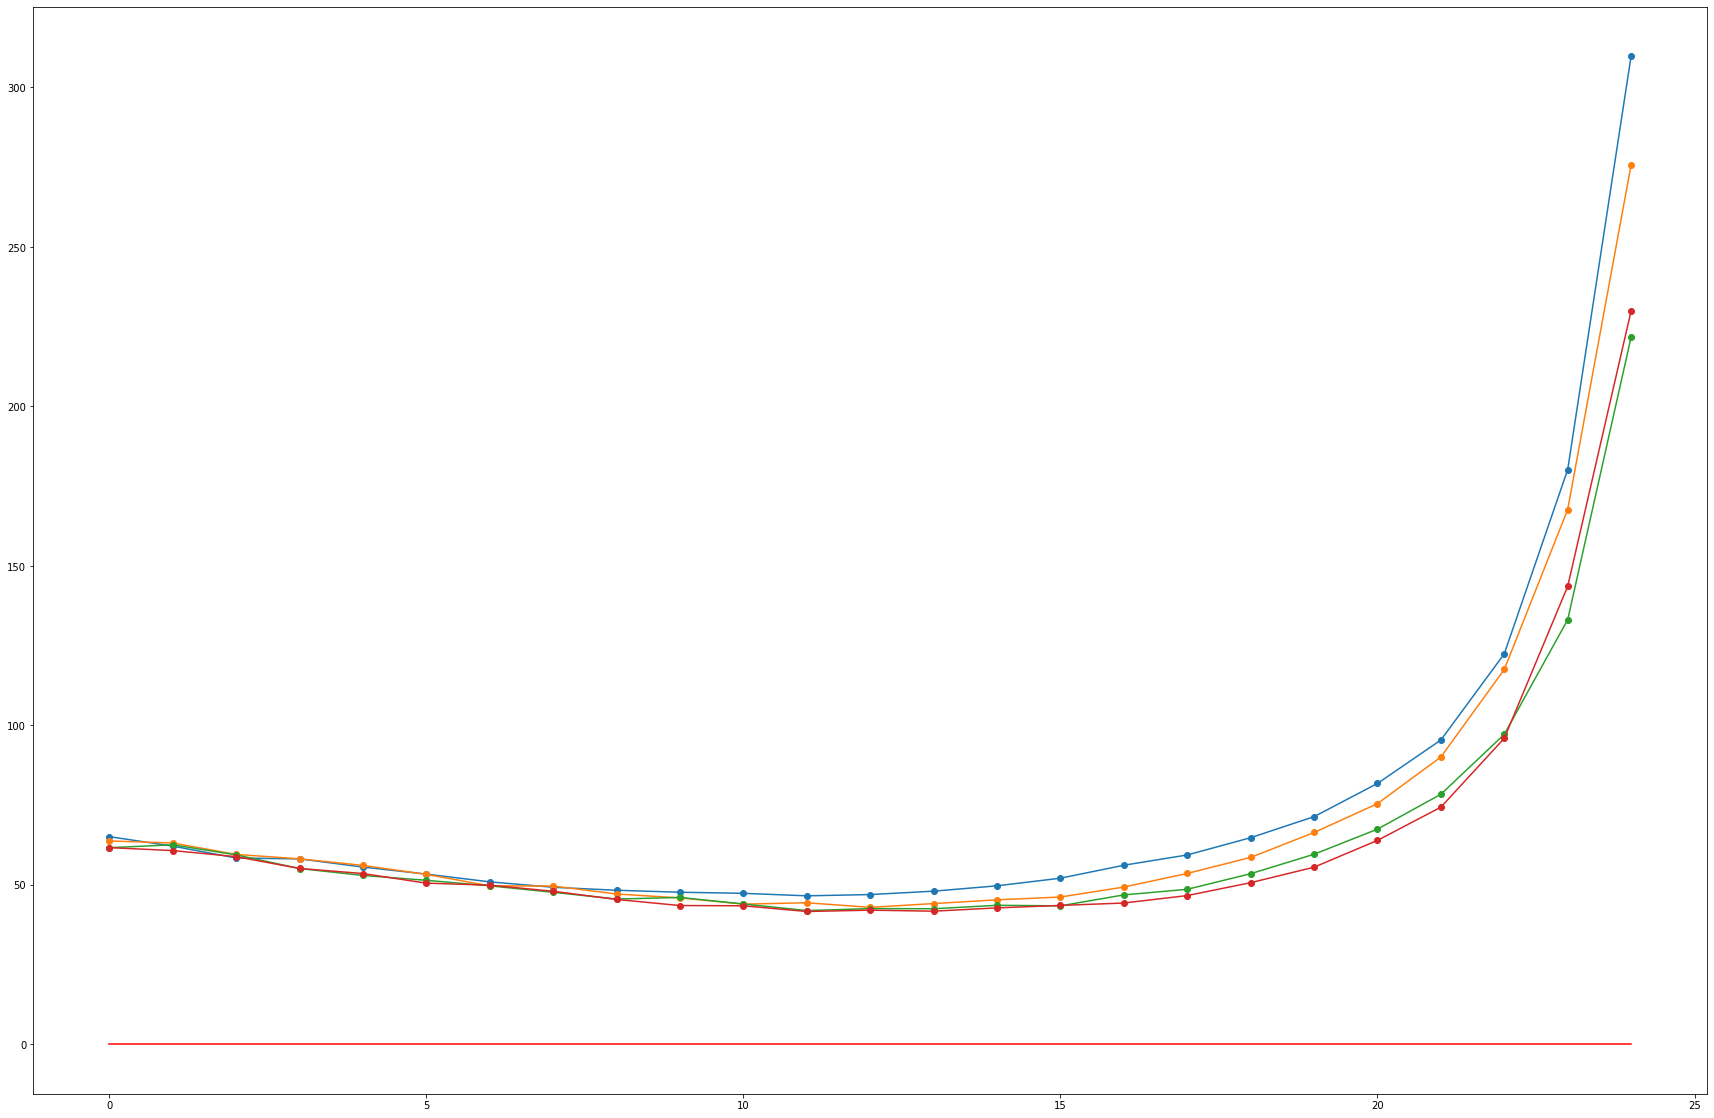

In [8]:
pl.plot_generates(TUR_log["TUR_lhs"],generate_num=generate_num)

0:tflatten(torch.ones(x.shape.cuda(


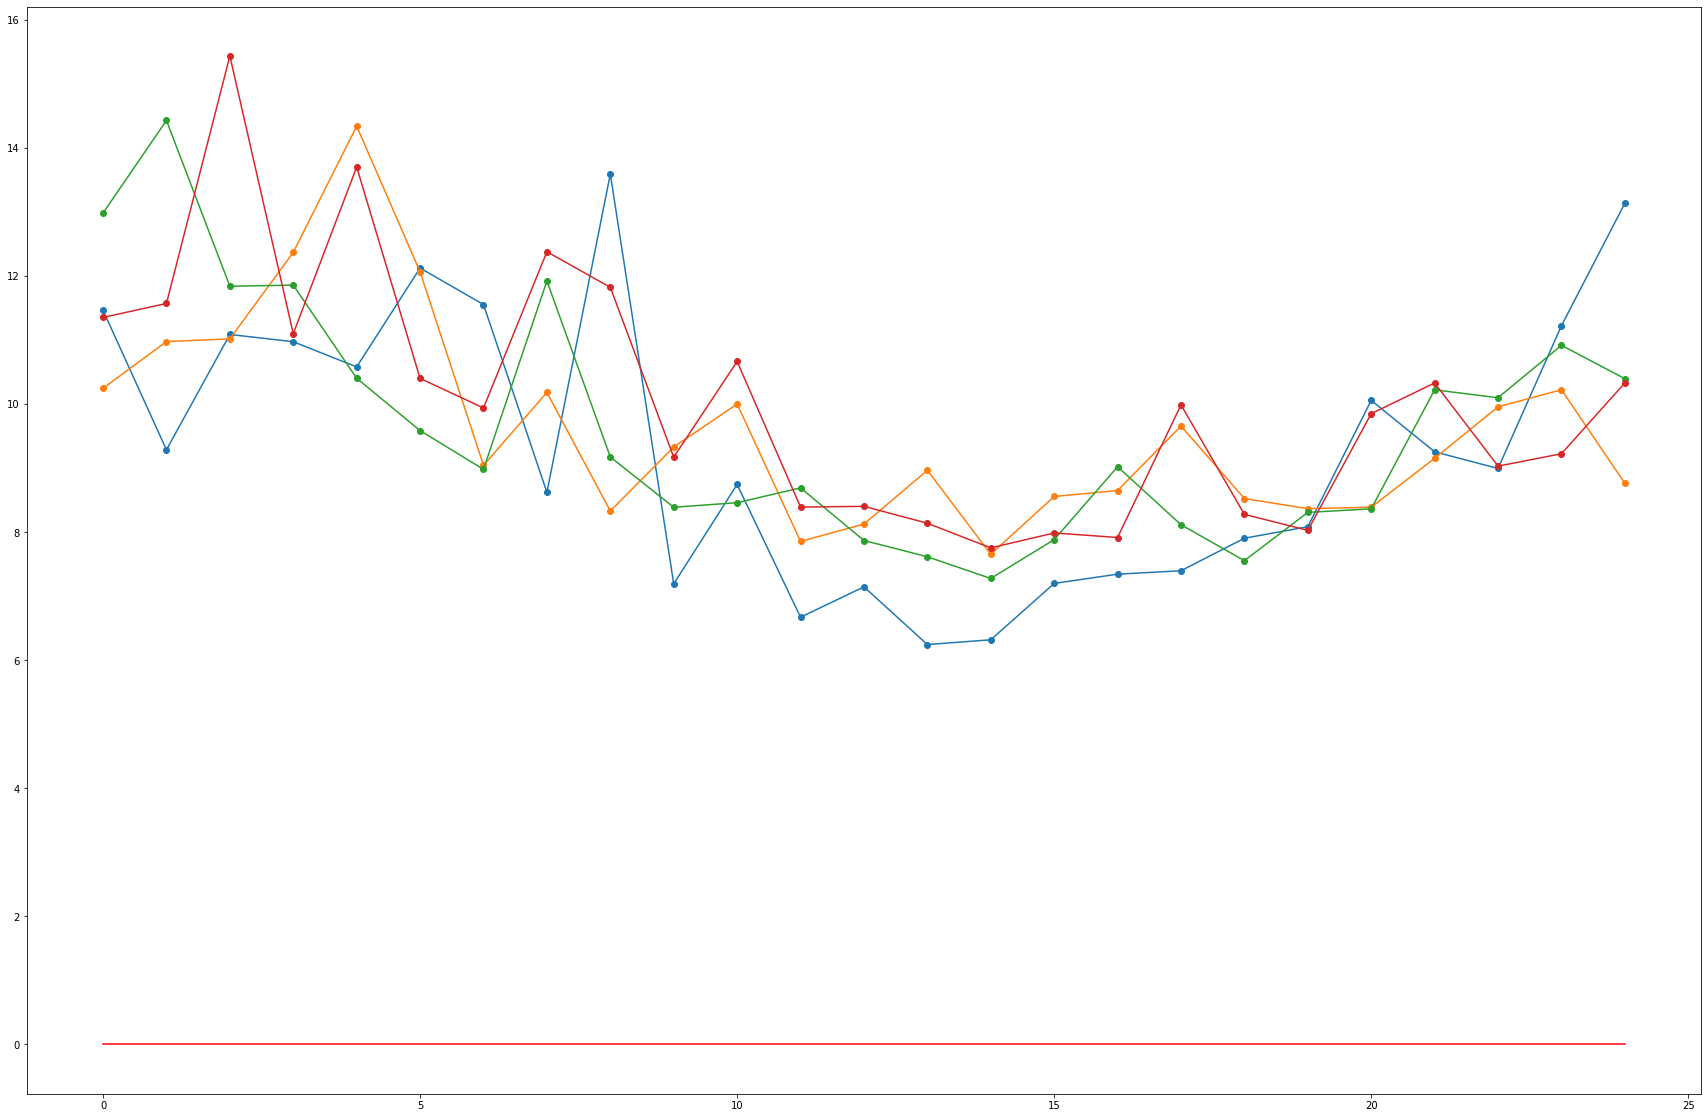

1:xf@


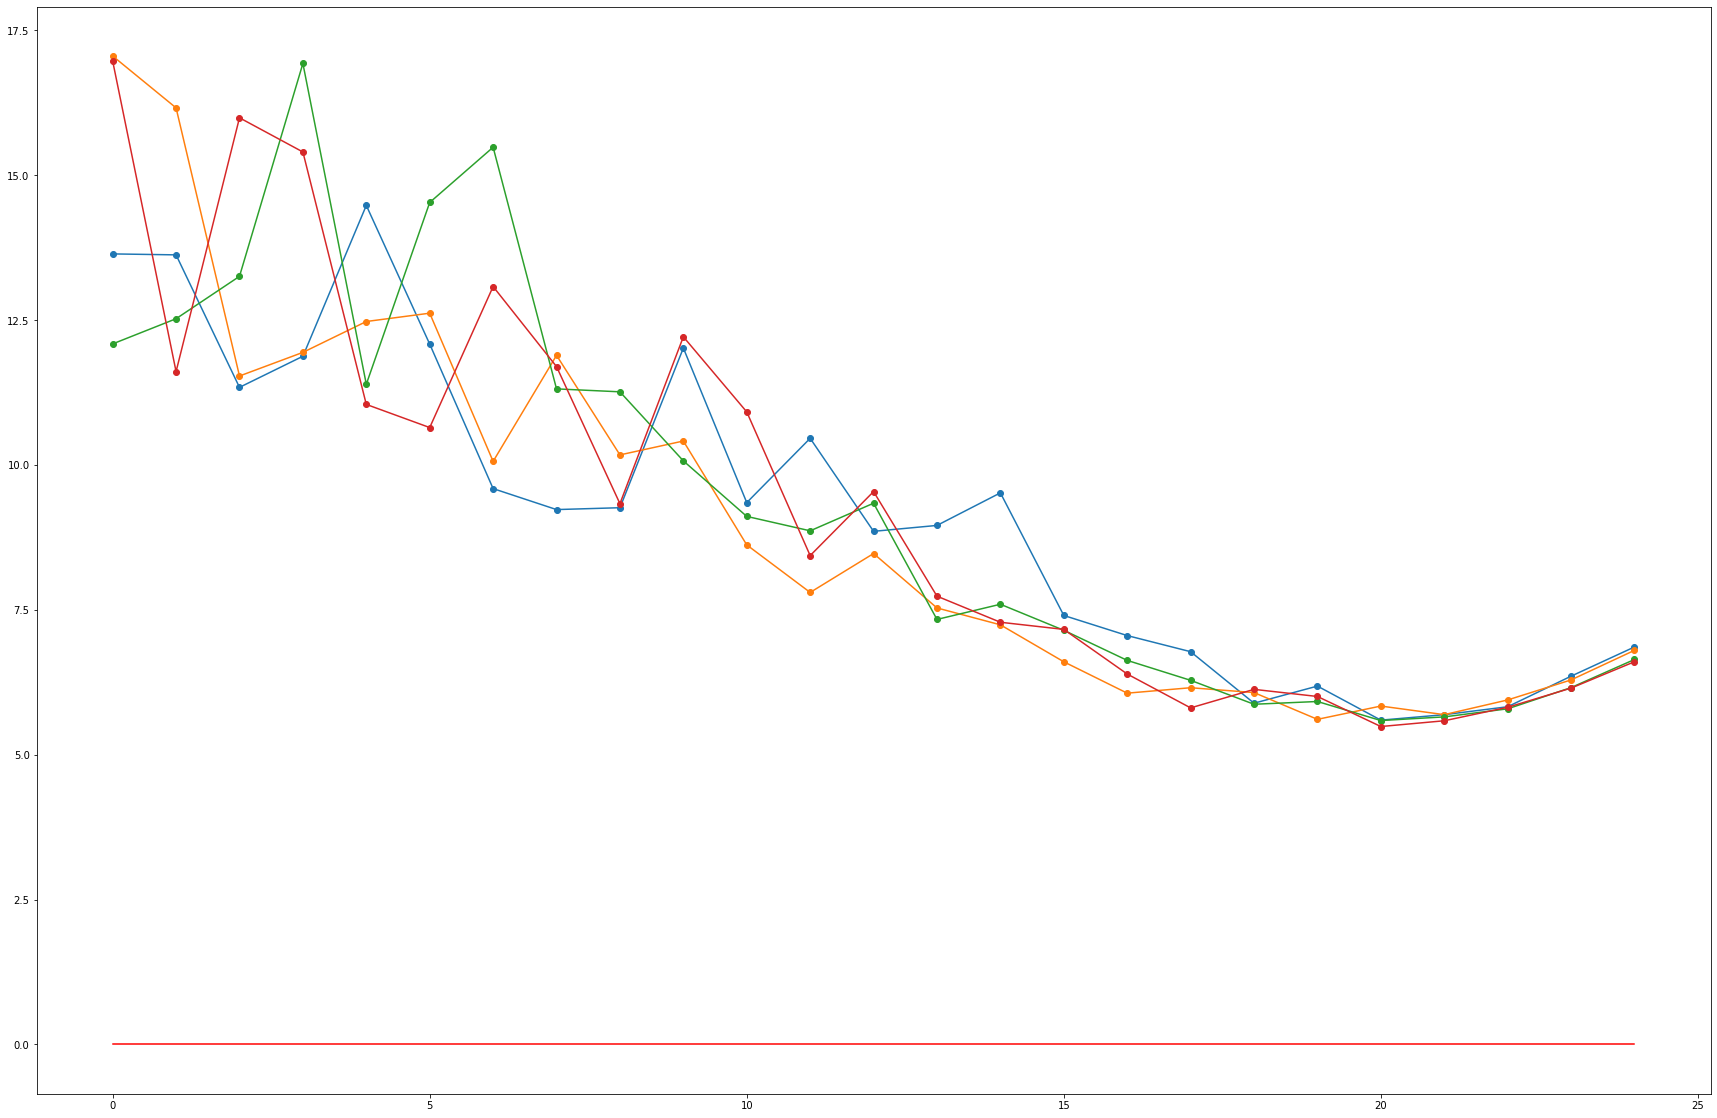

2:-xf2@


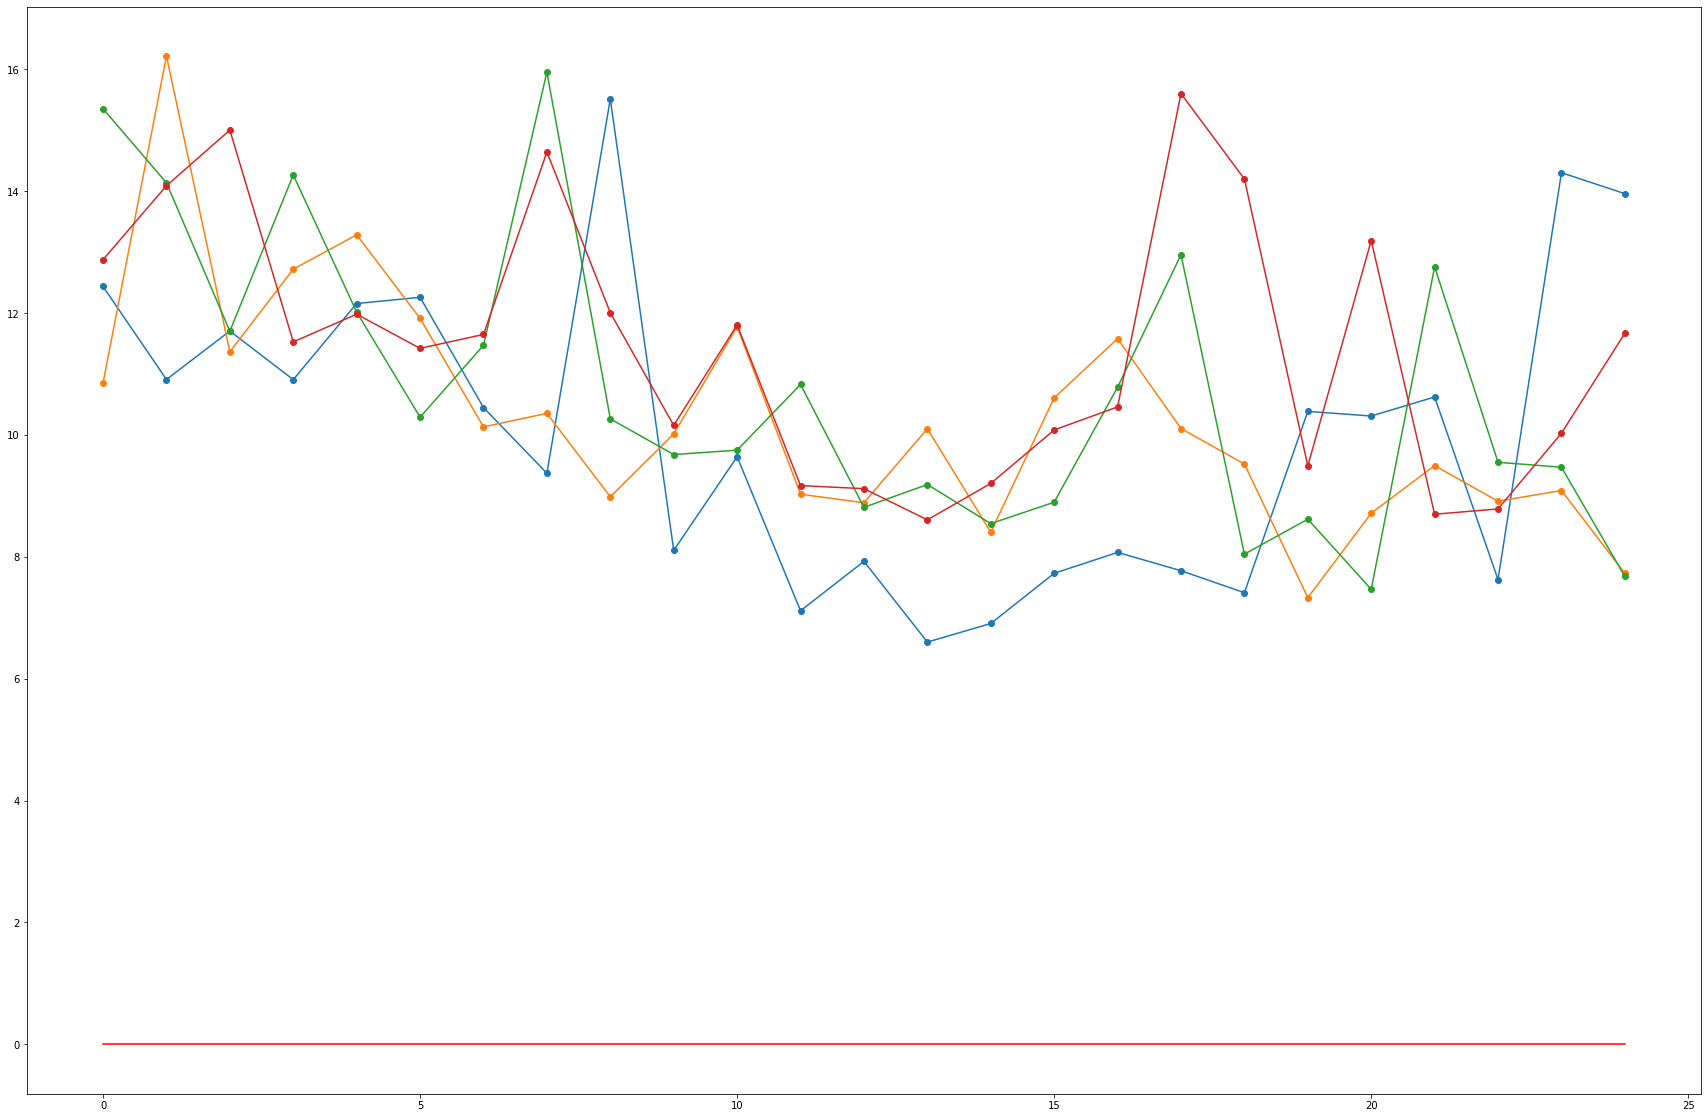

3:x@


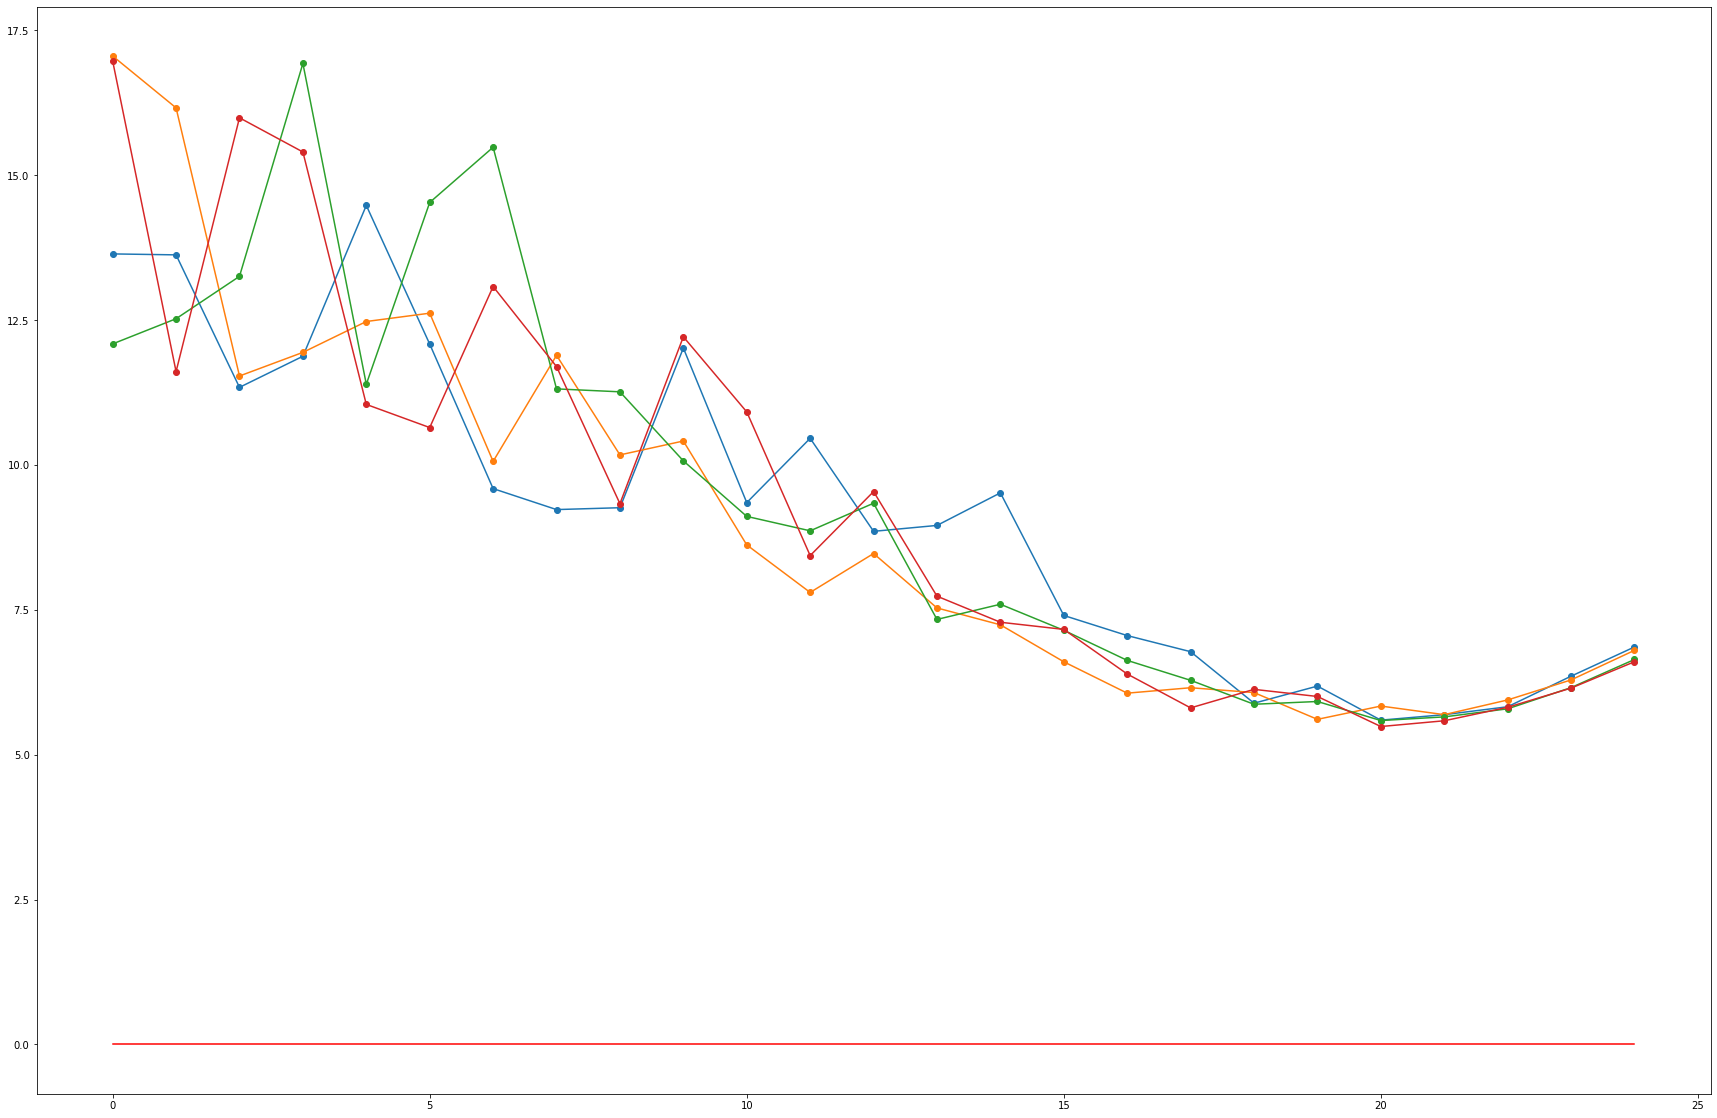

4:x2@


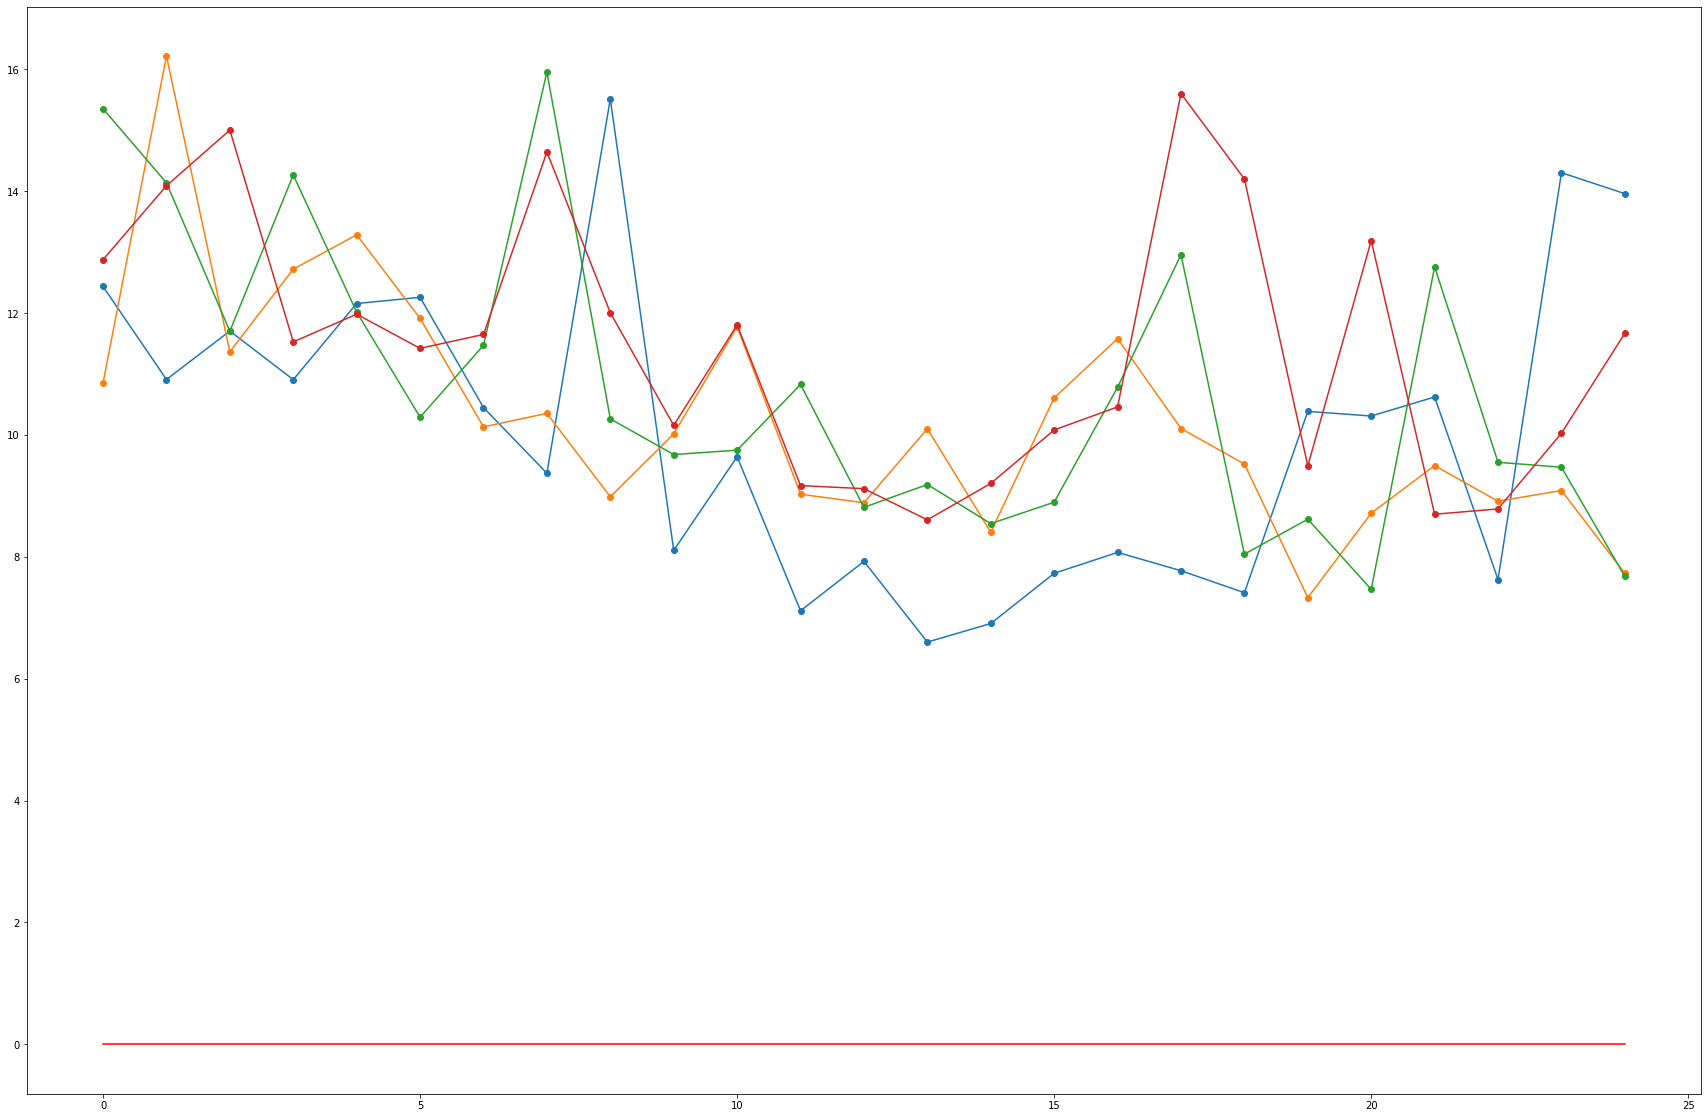

5:F


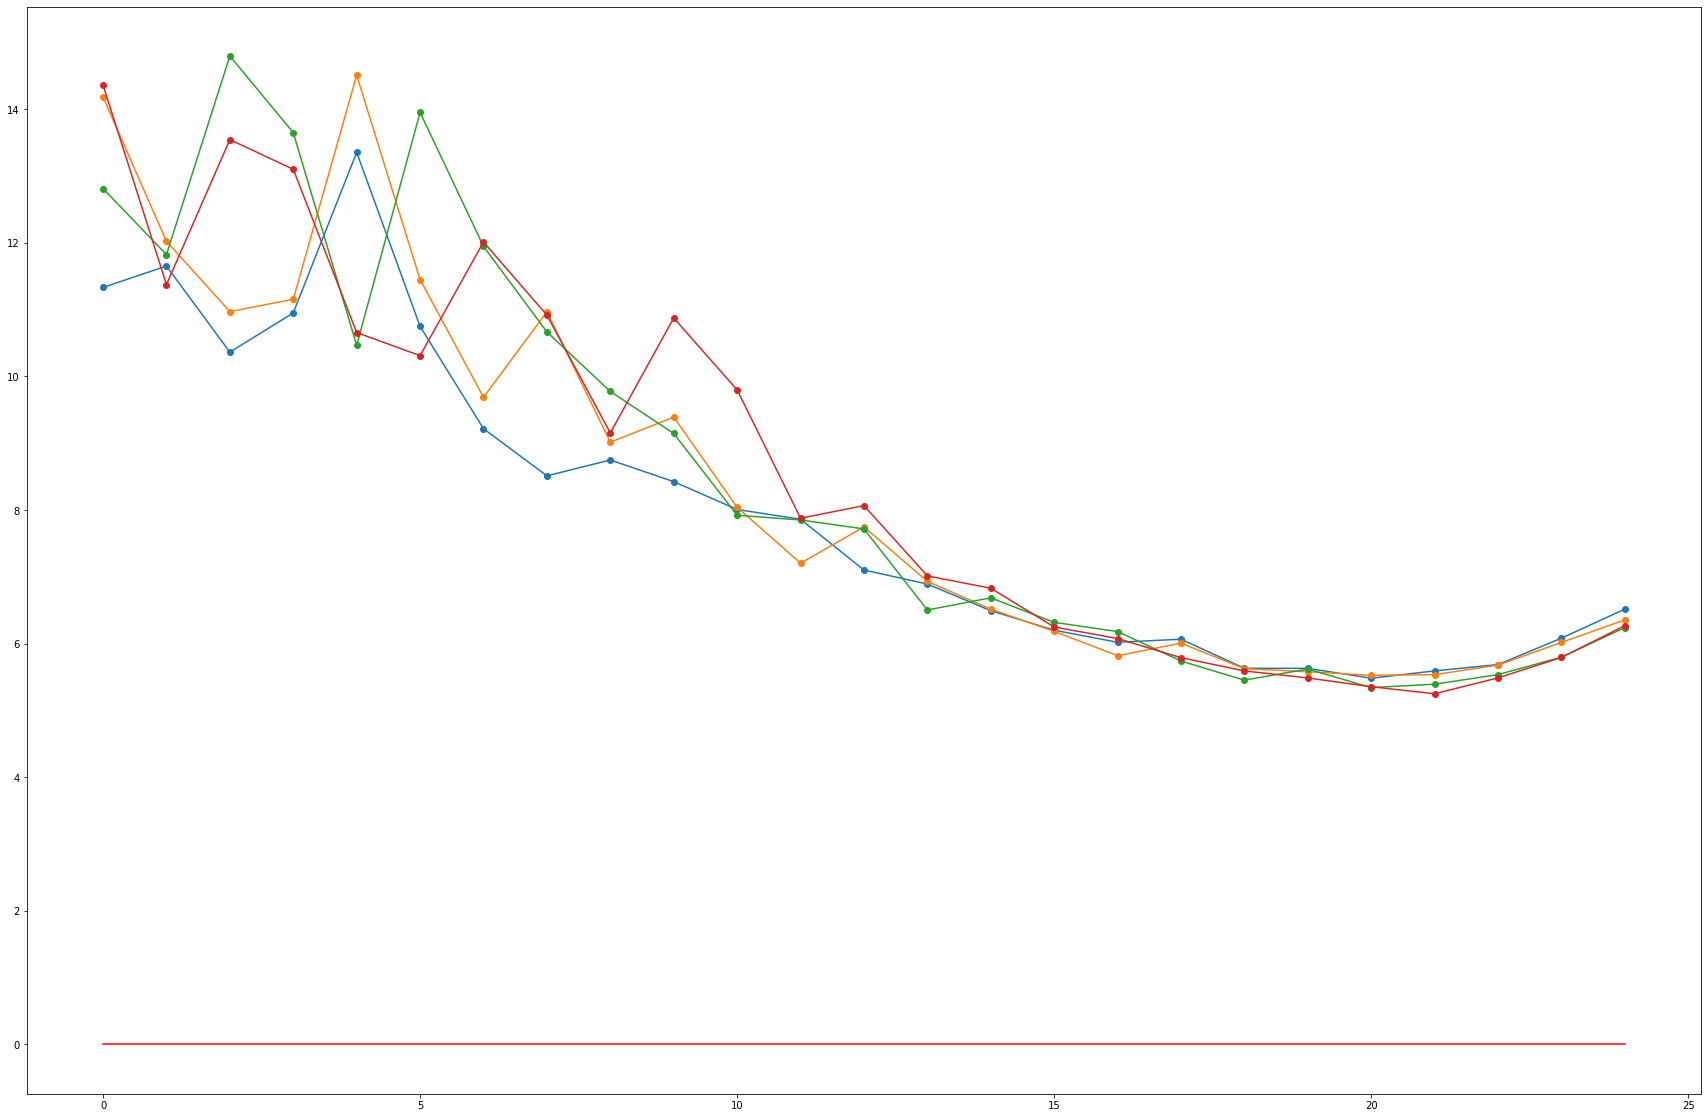

In [11]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhs."+str(i)],generate_num=generate_num)
    plt.show()

0:tflatten(torch.ones(x.shape.cuda(


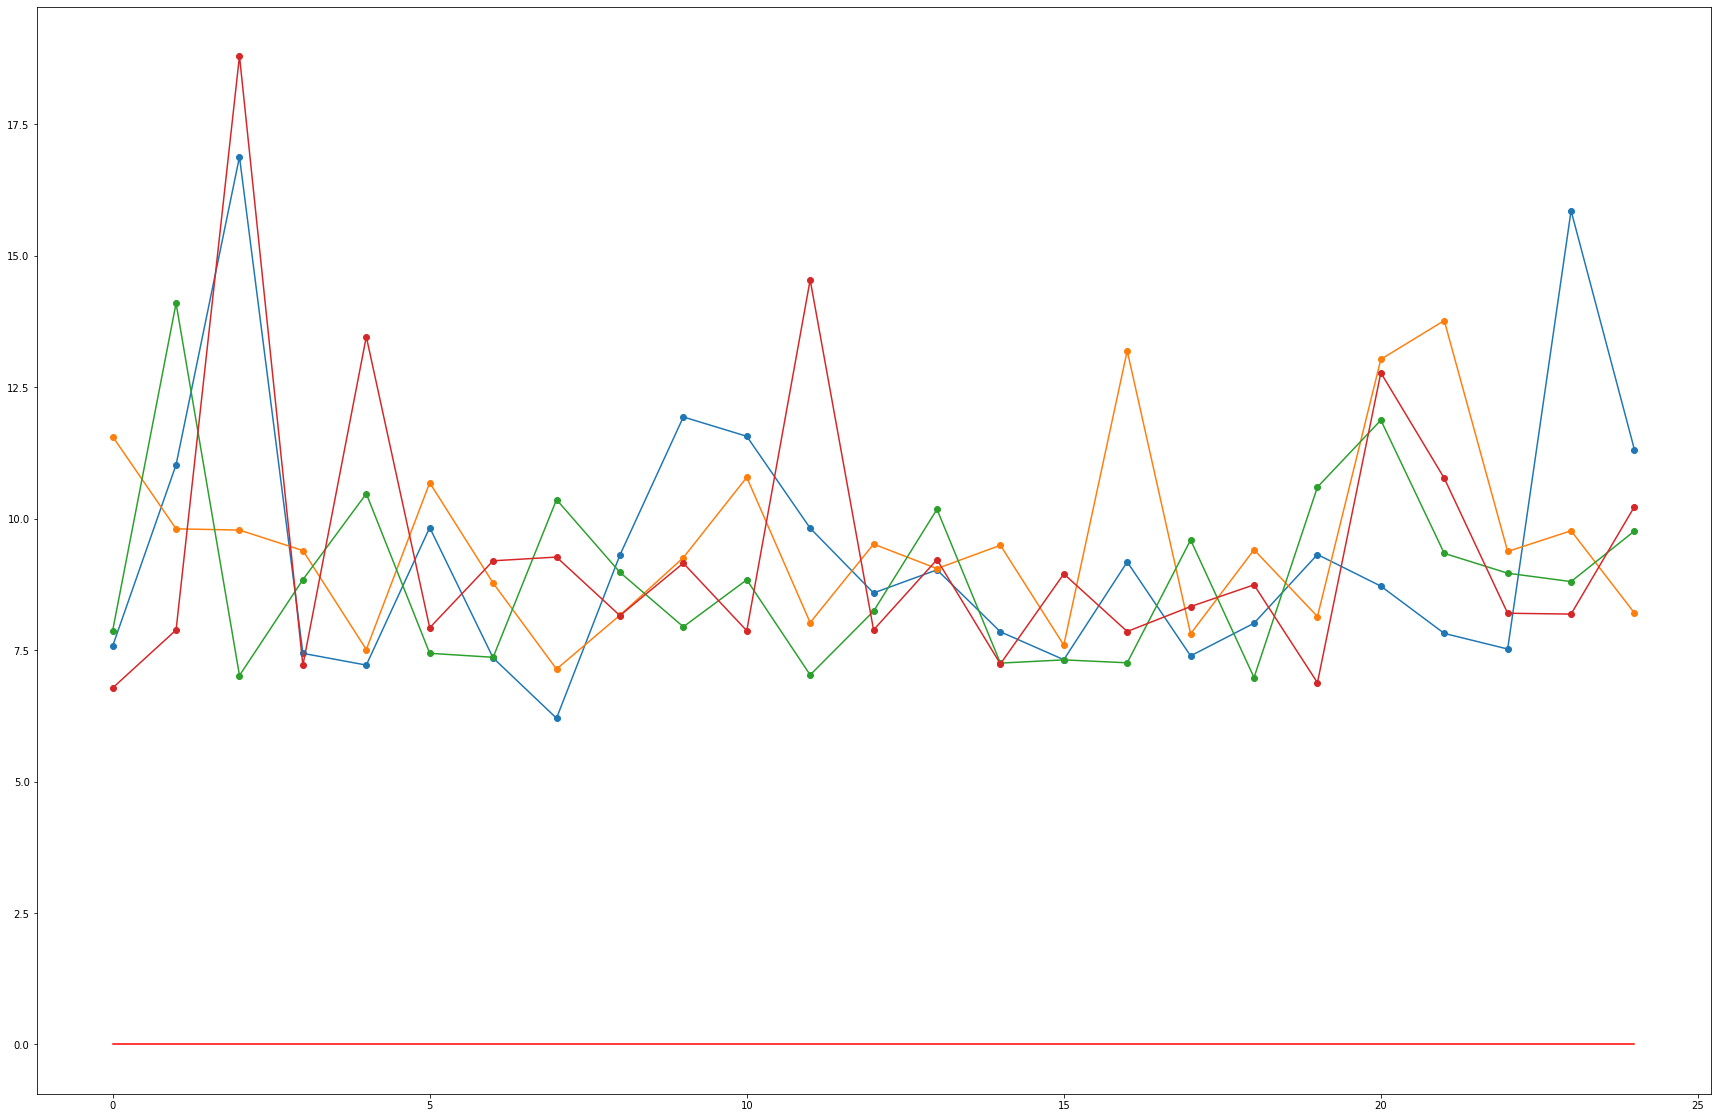

1:xf@


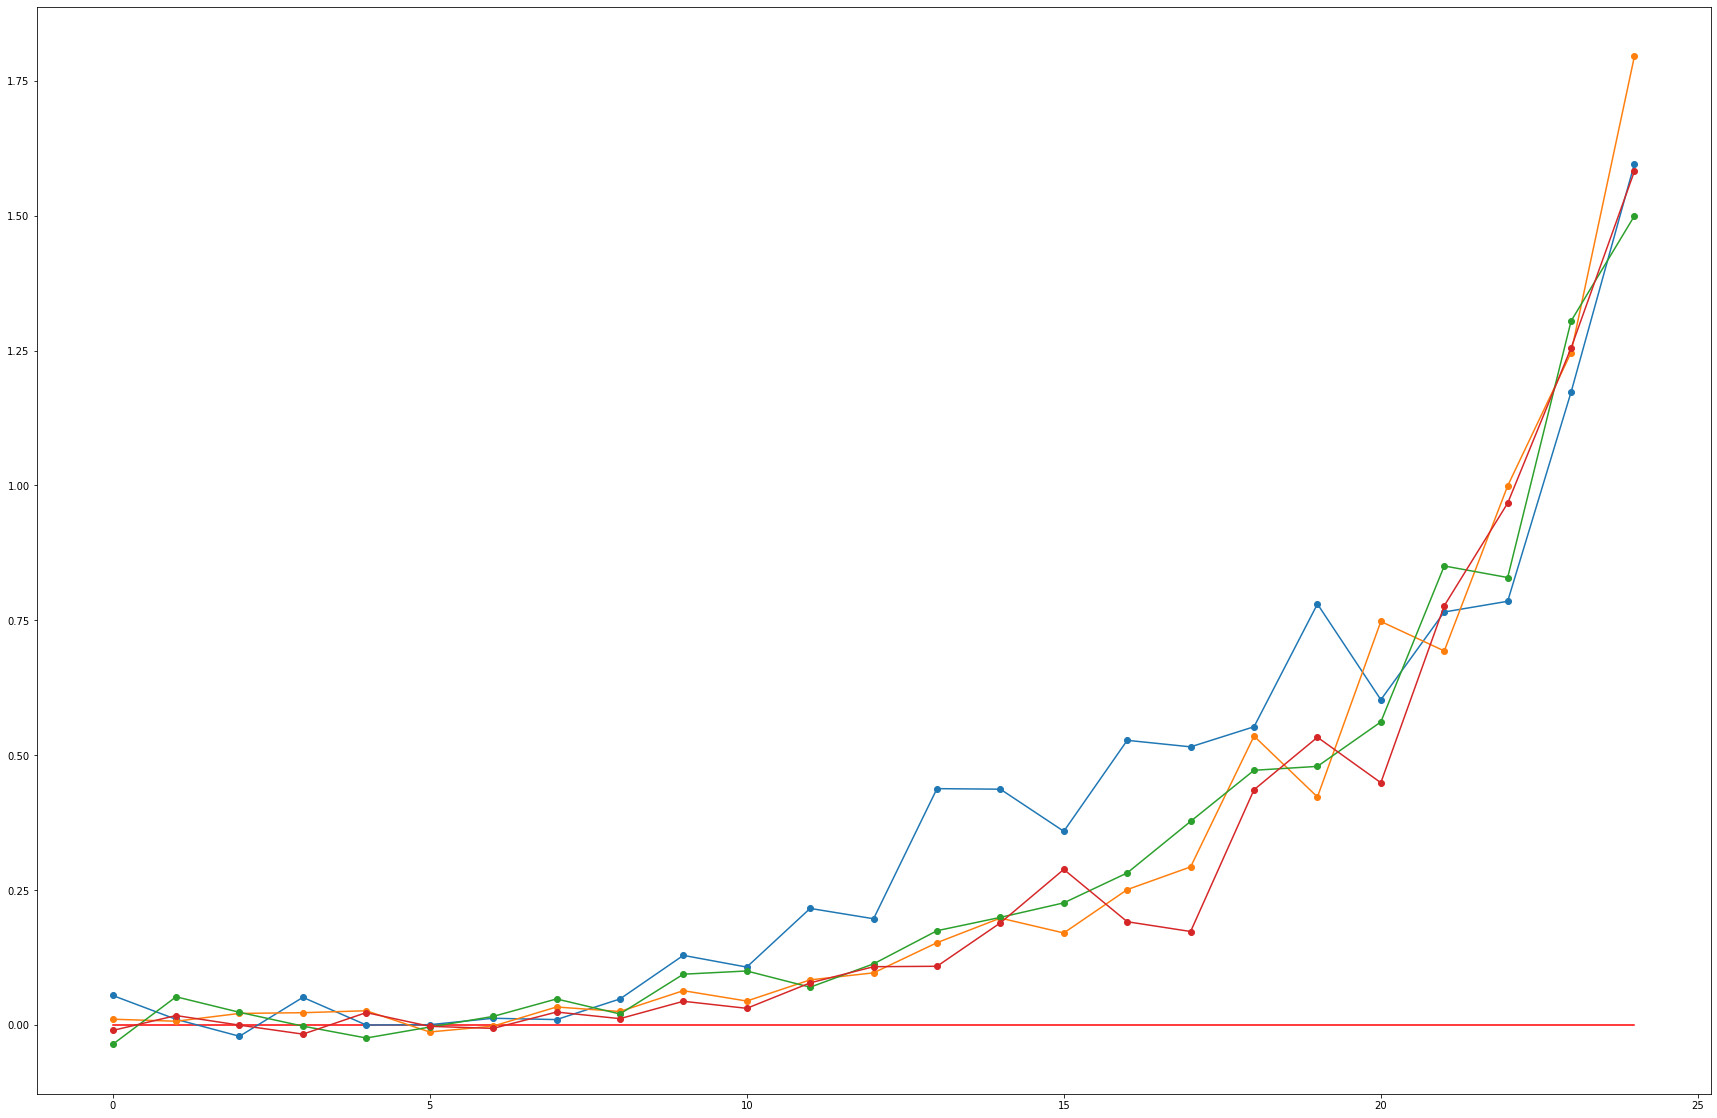

2:-xf2@


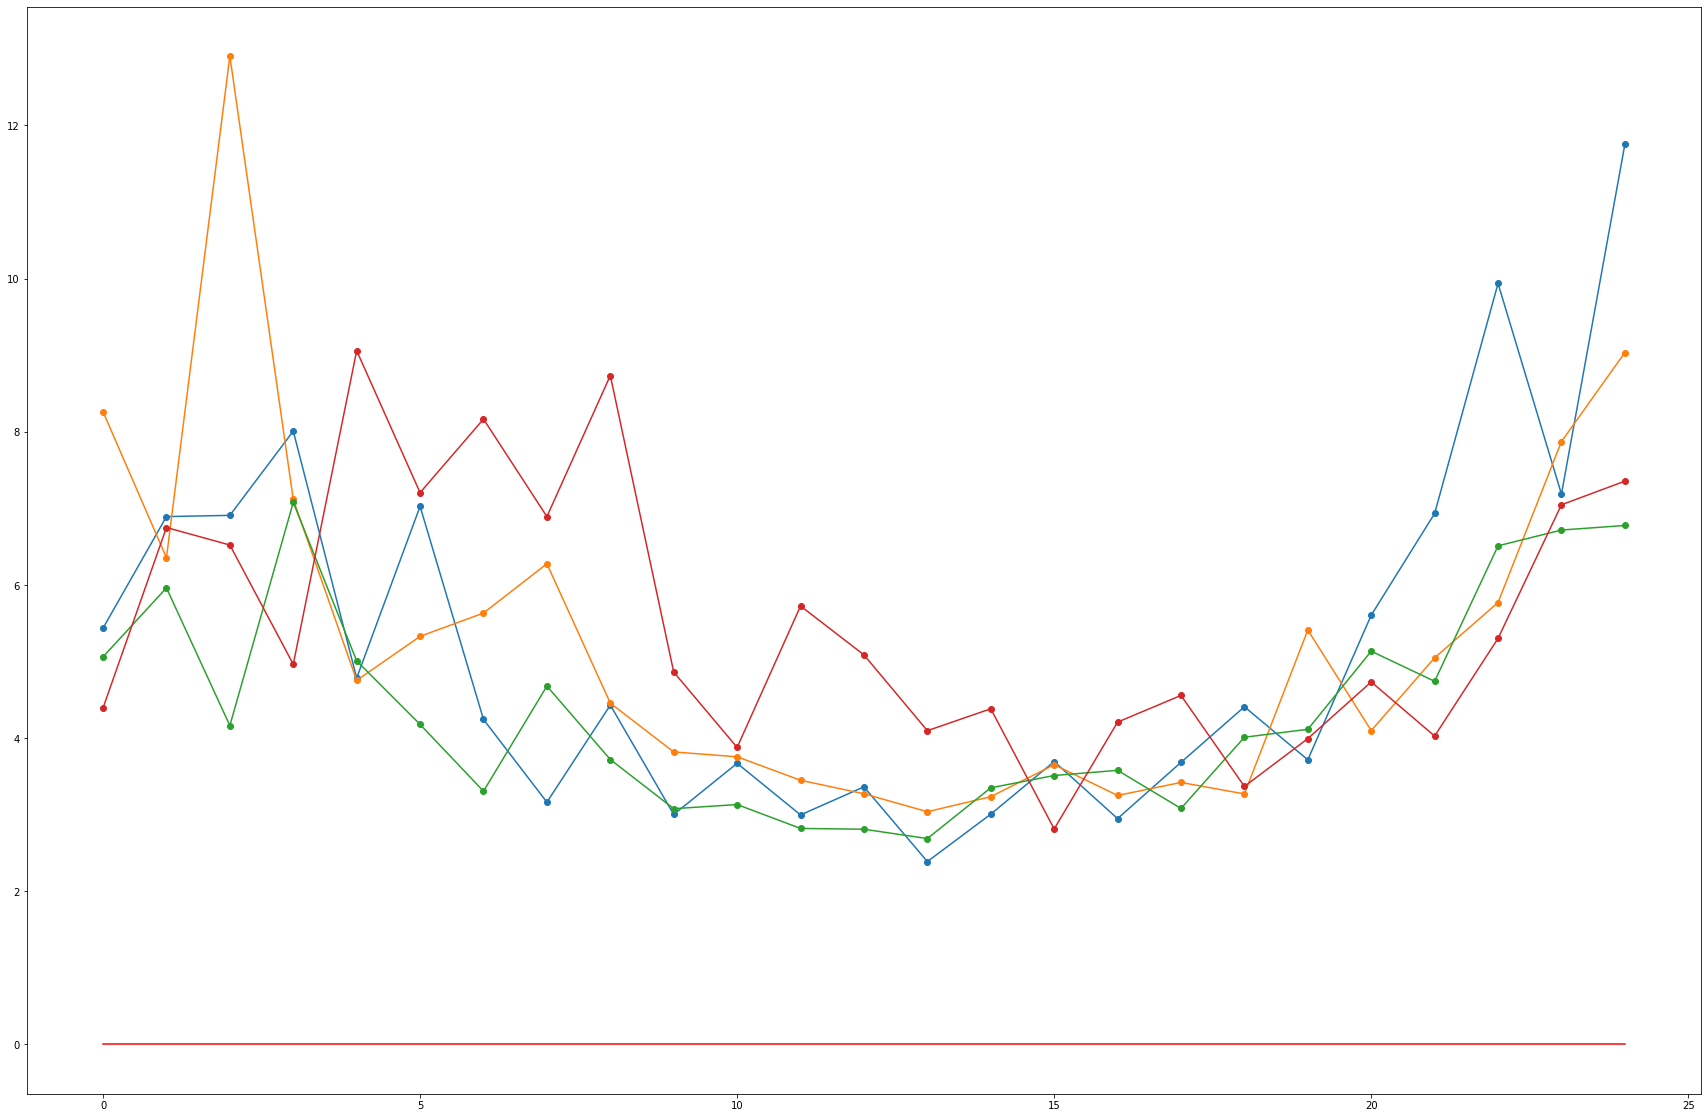

3:x@


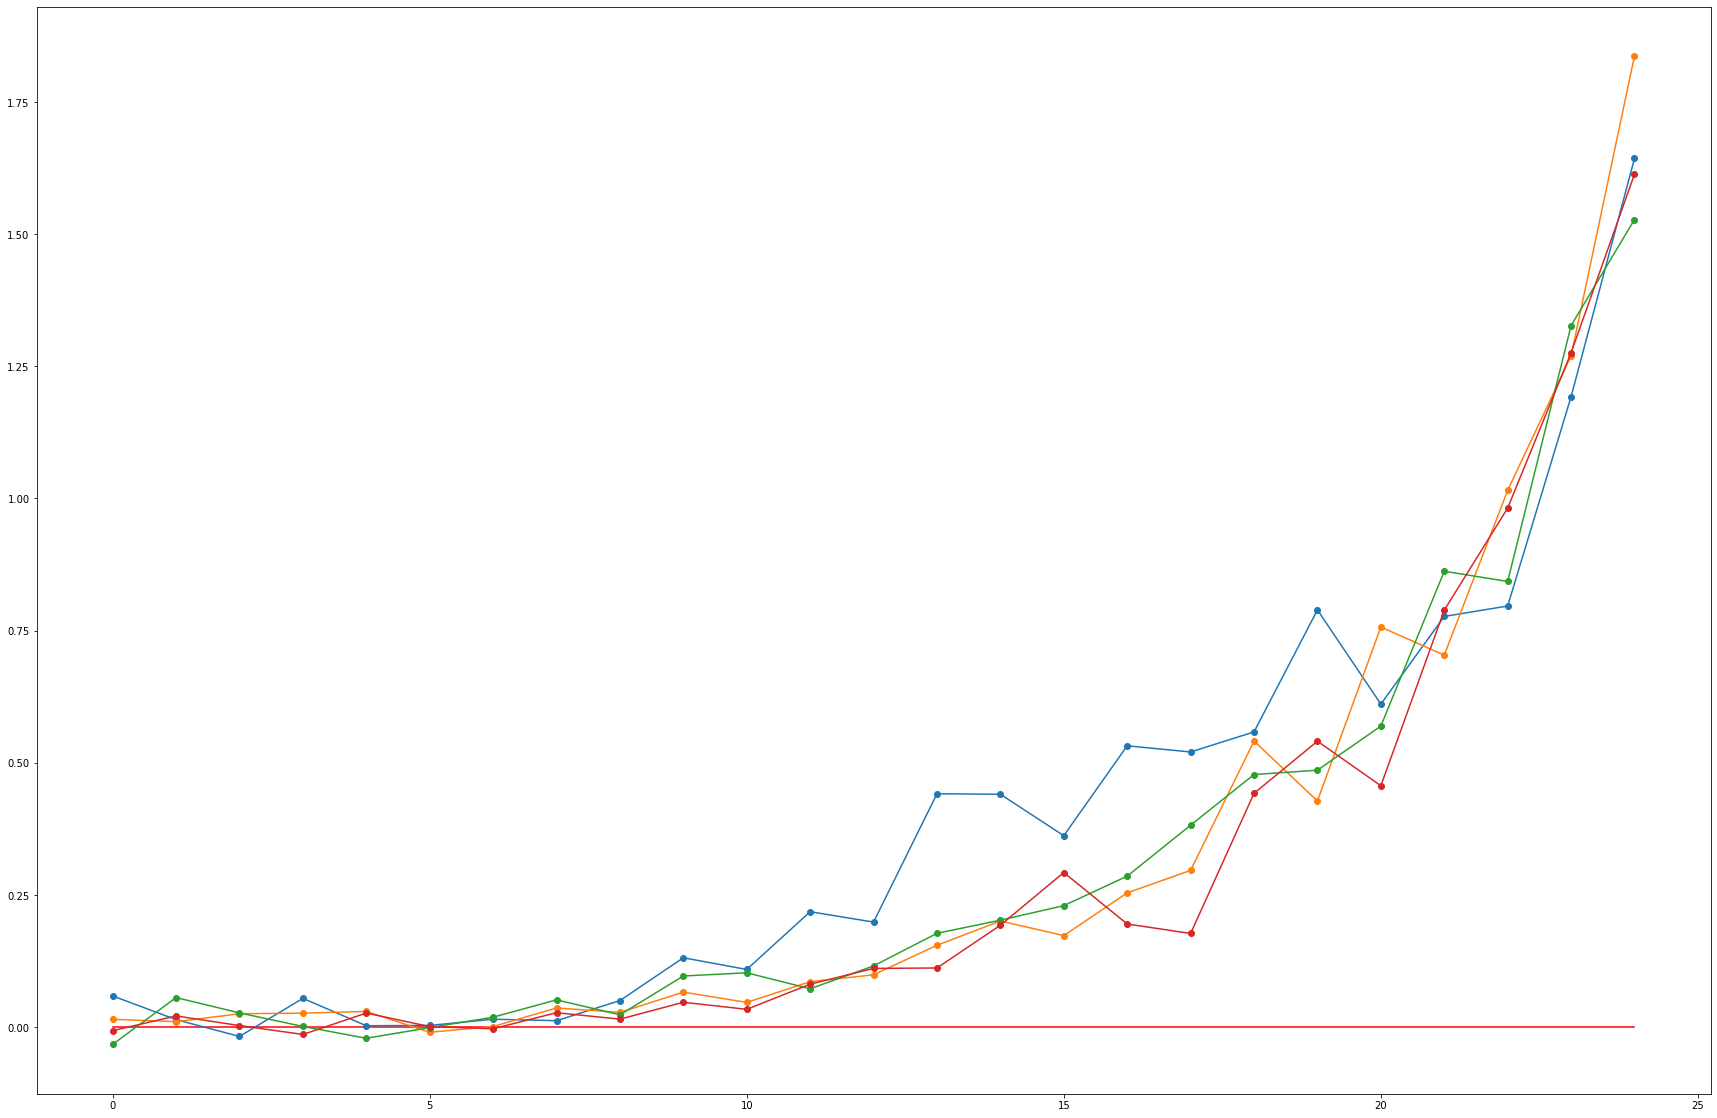

4:x2@


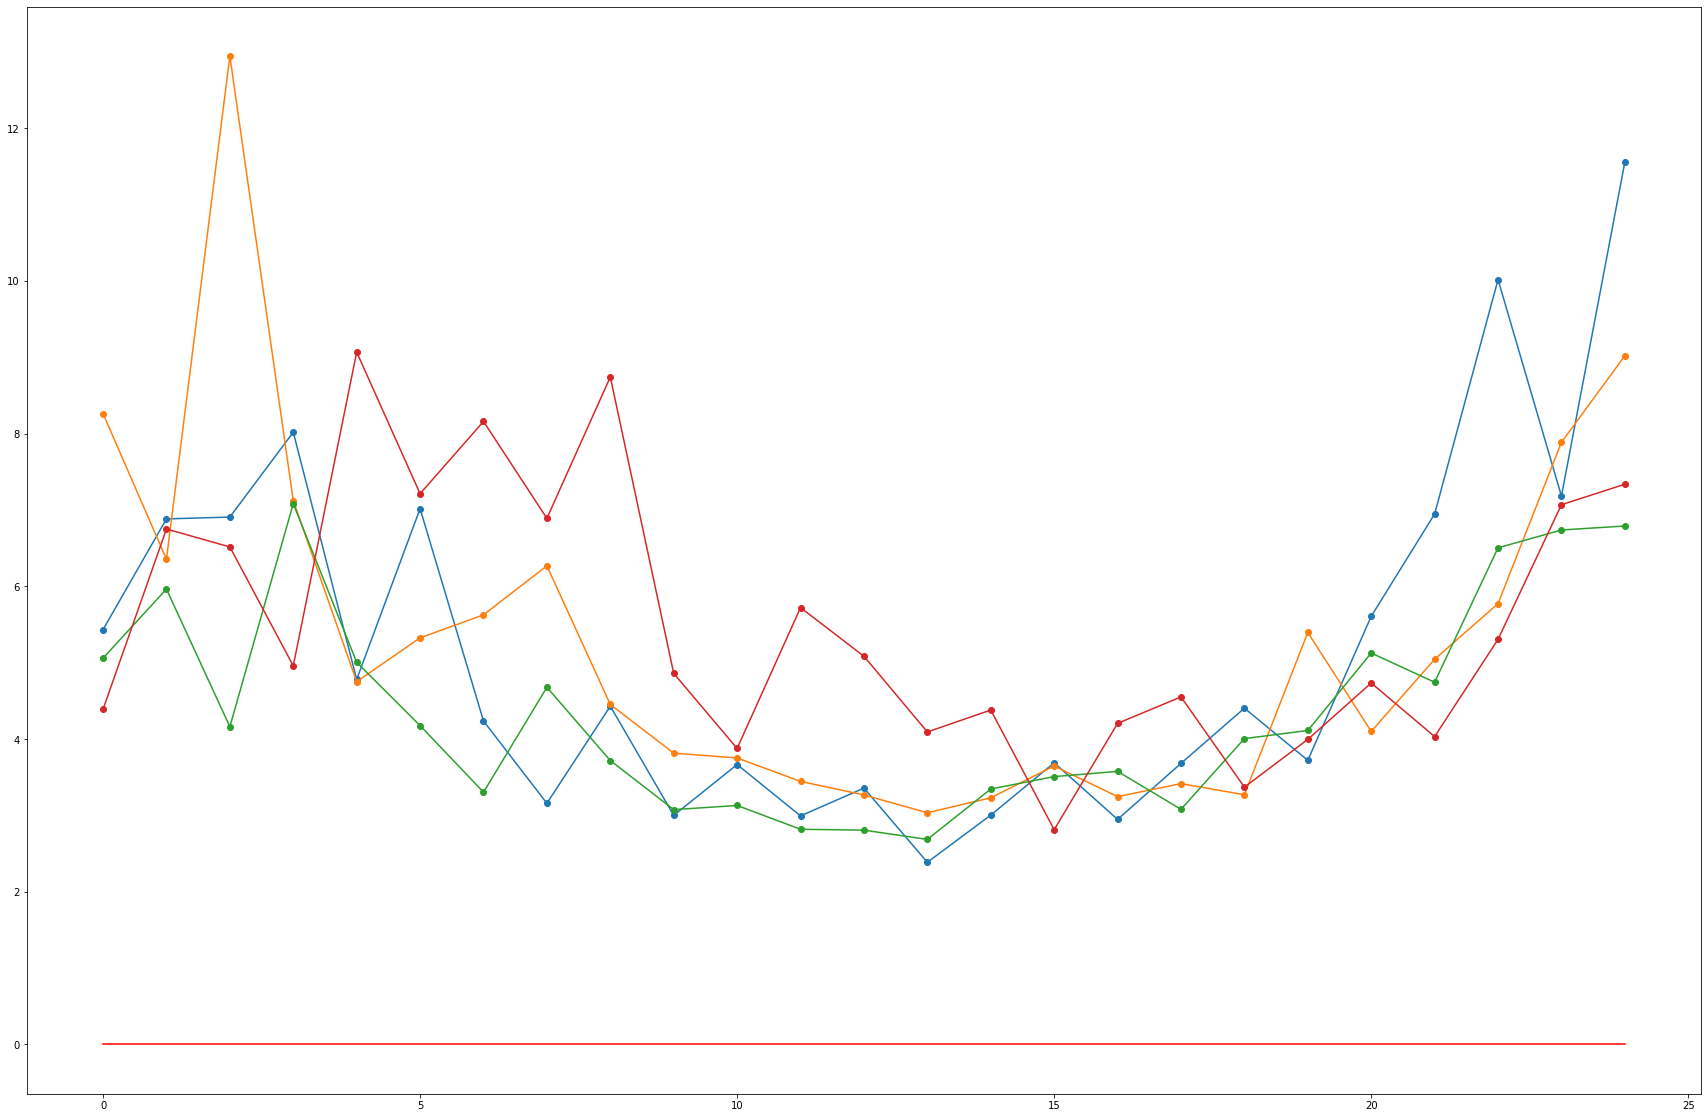

5:F


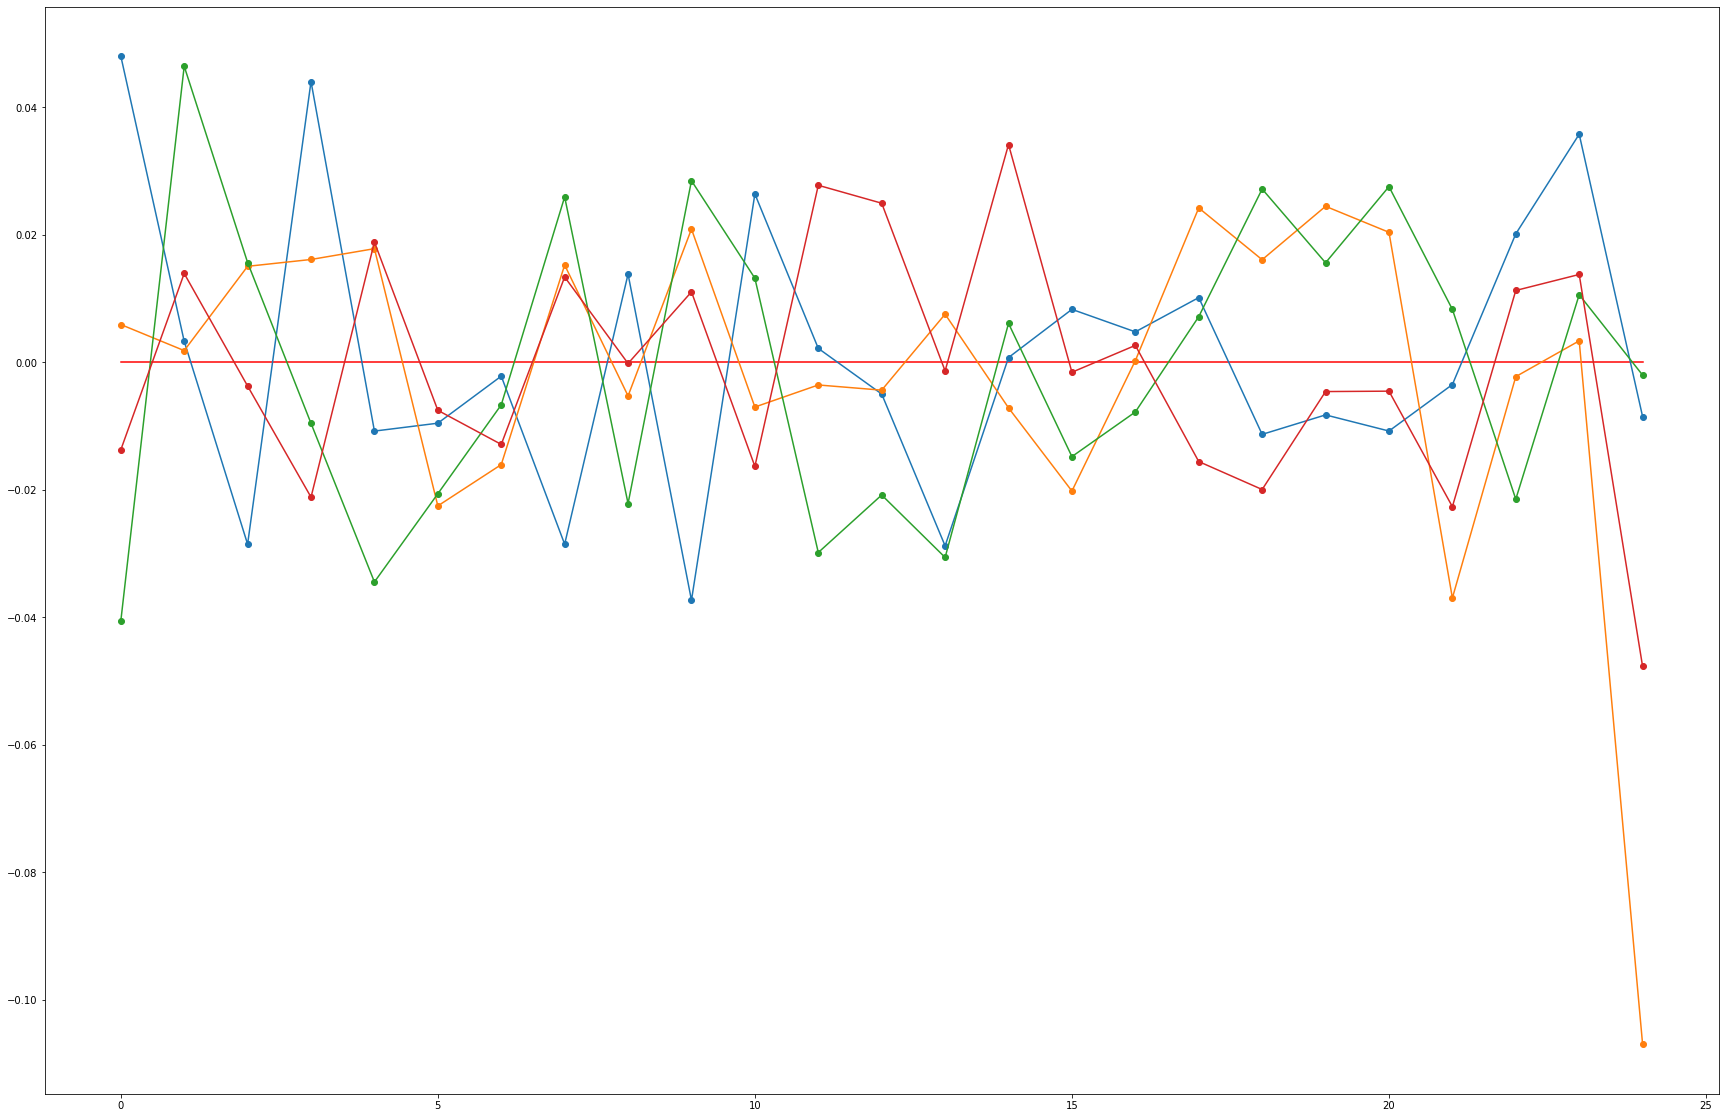

In [12]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

# 異なるサンプル手法A,B,Vの比較

## V/A

0:tflatten(torch.ones(x.shape.cuda(


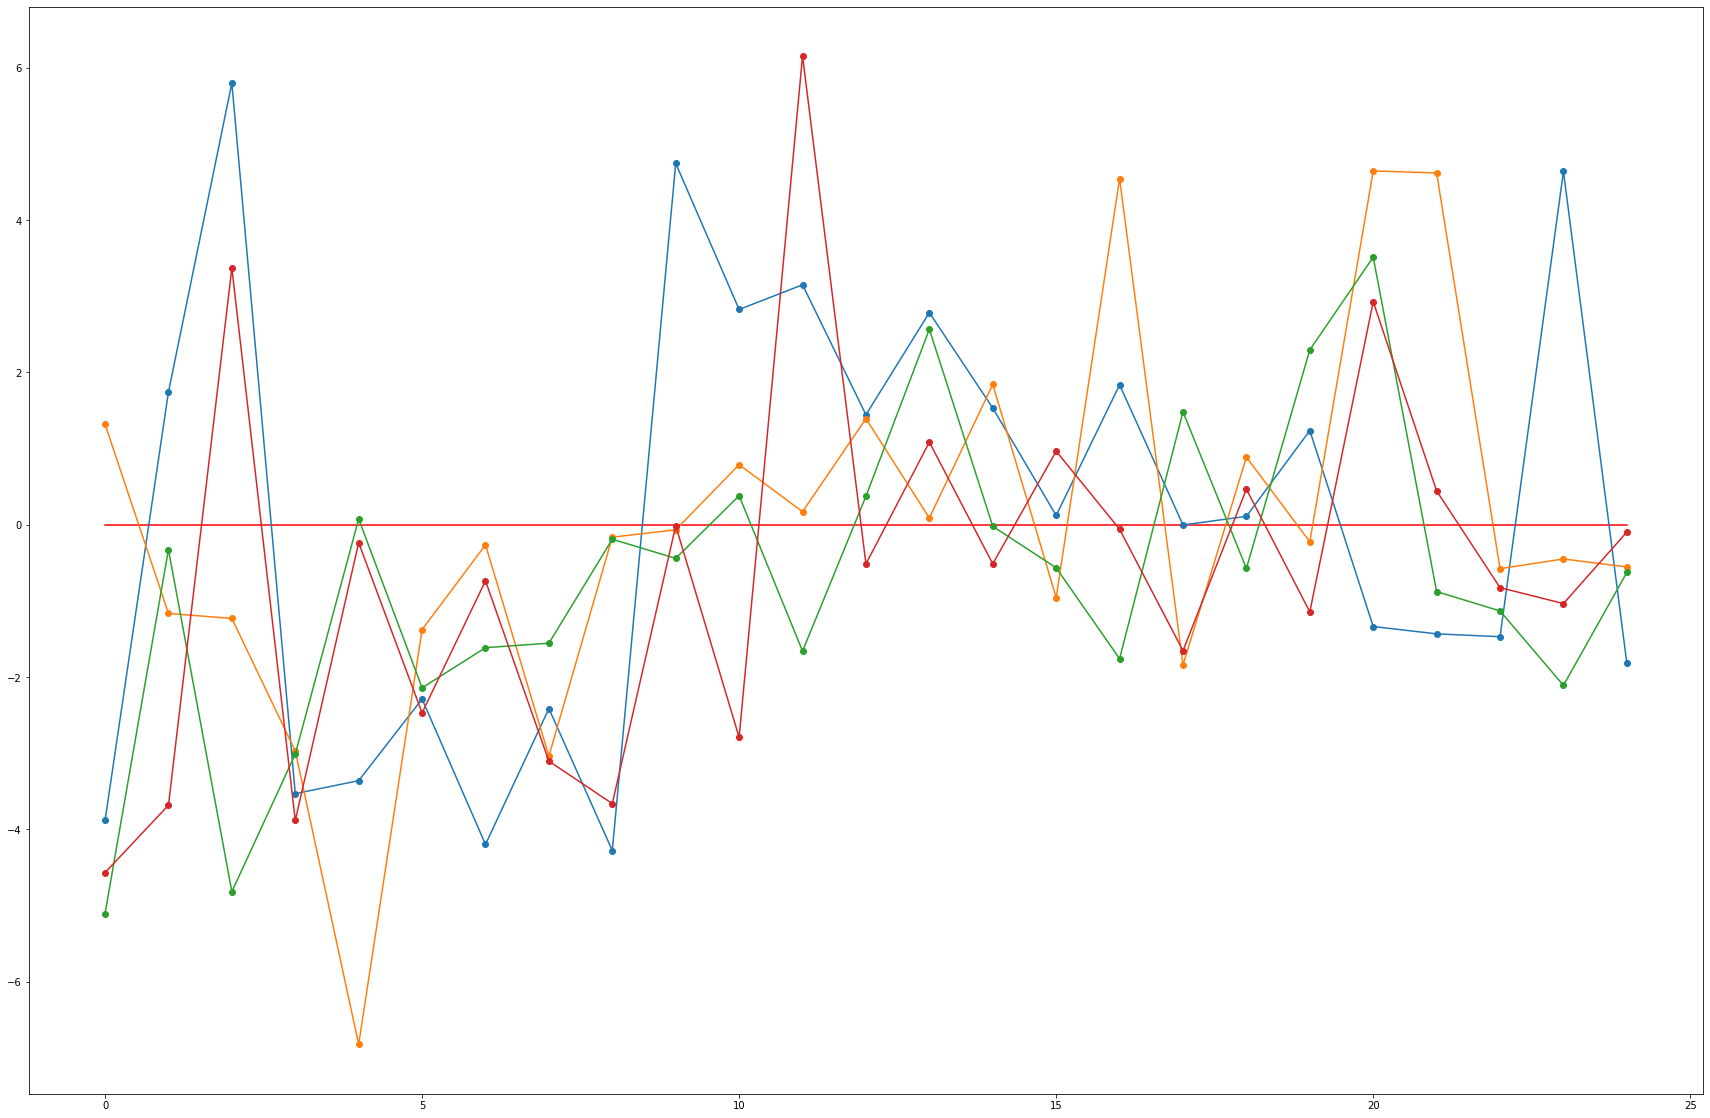

1:xf@


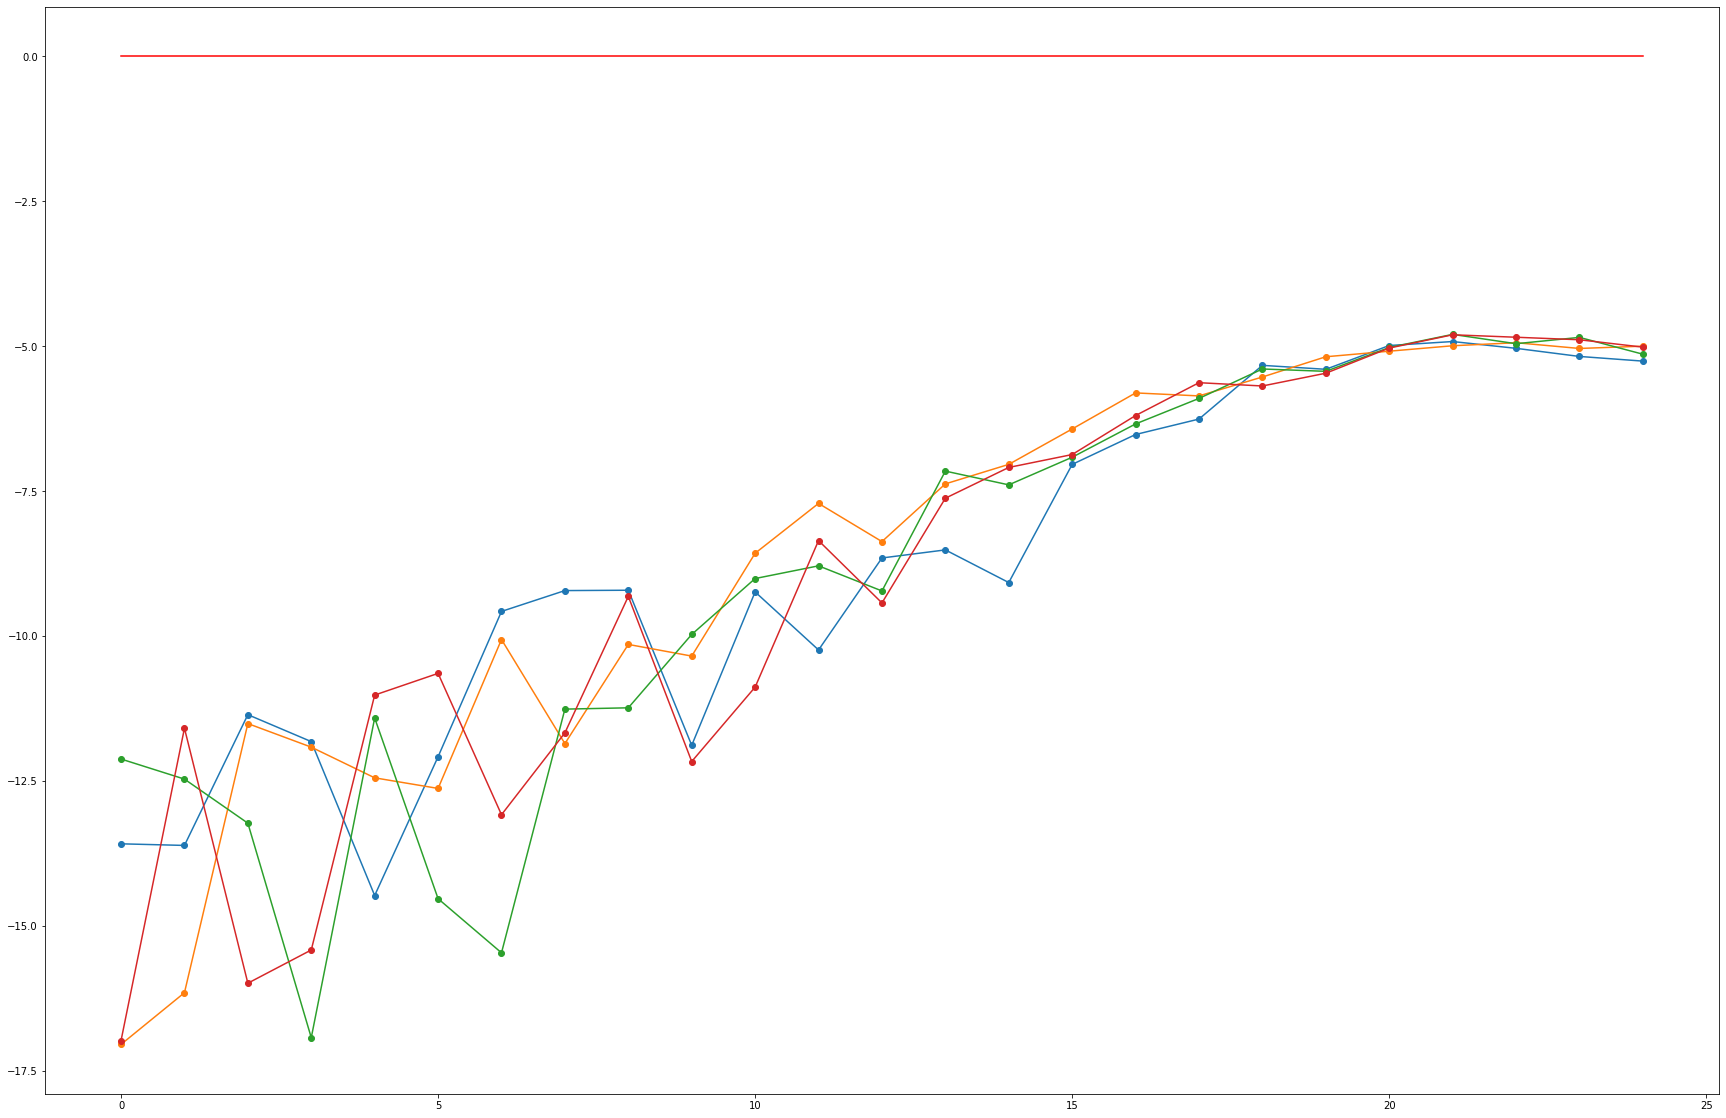

2:-xf2@


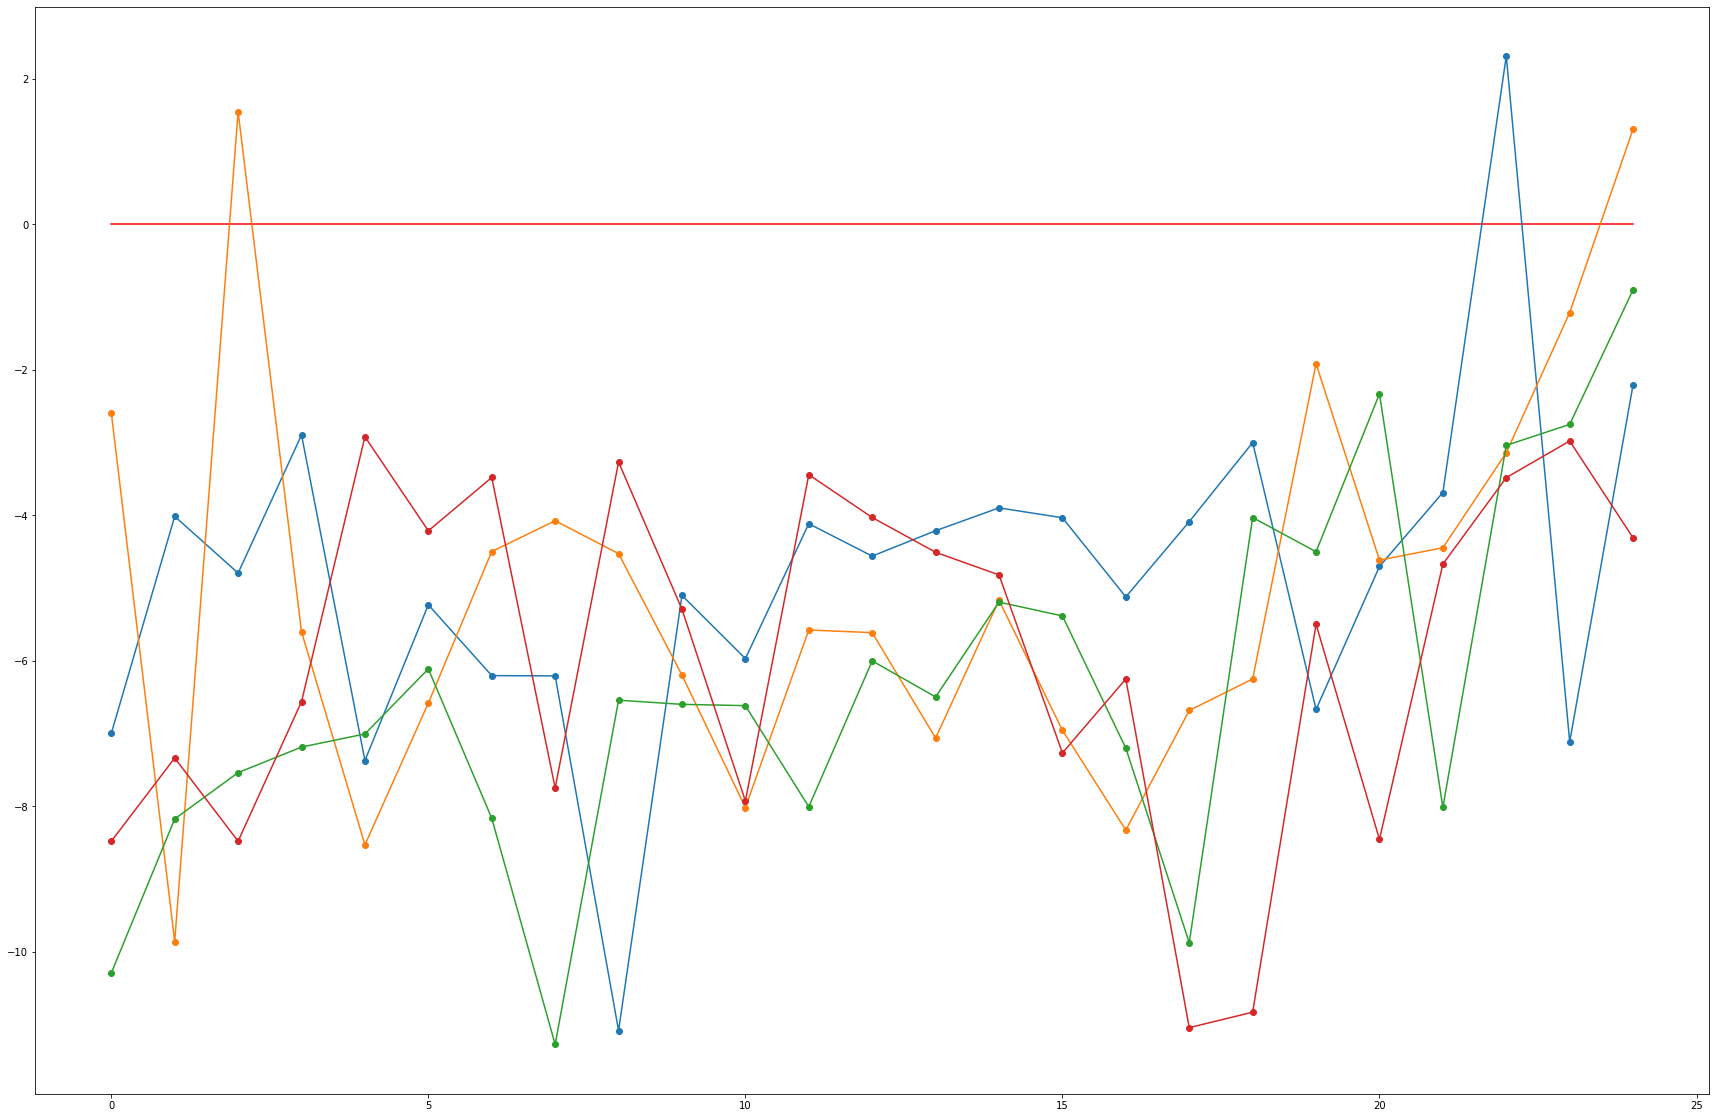

3:x@


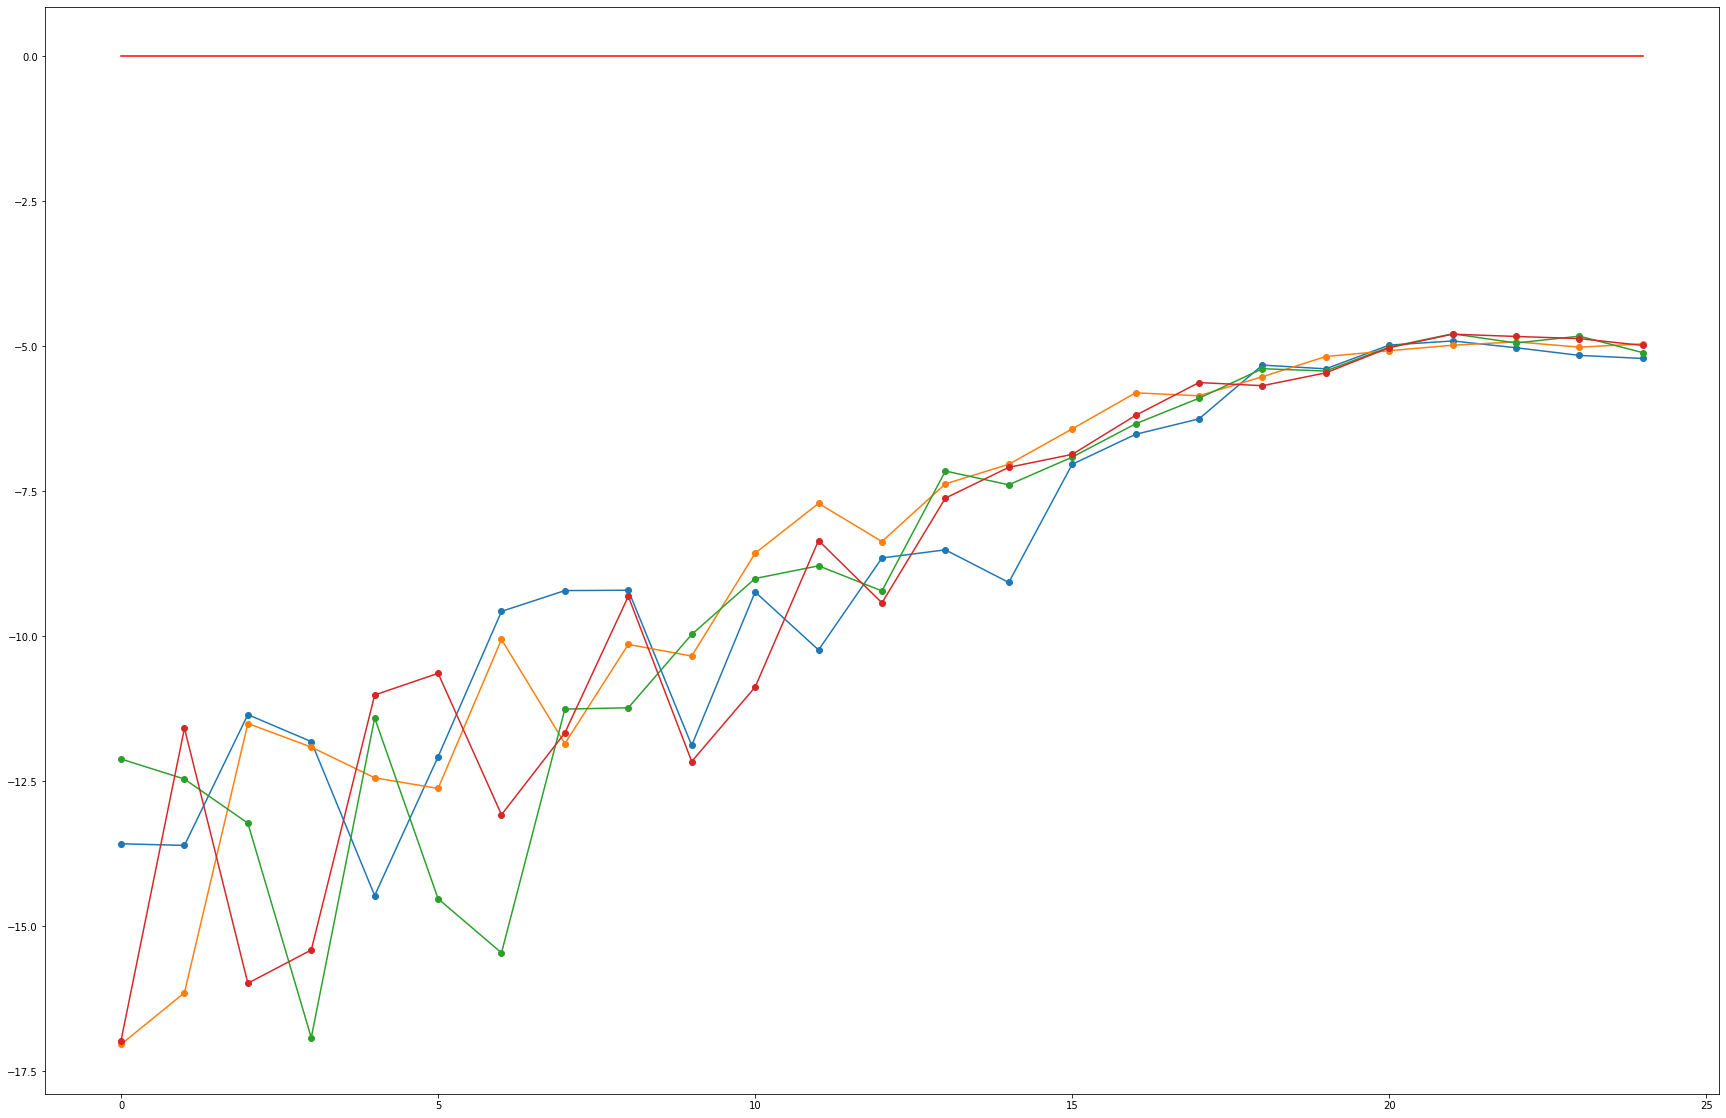

4:x2@


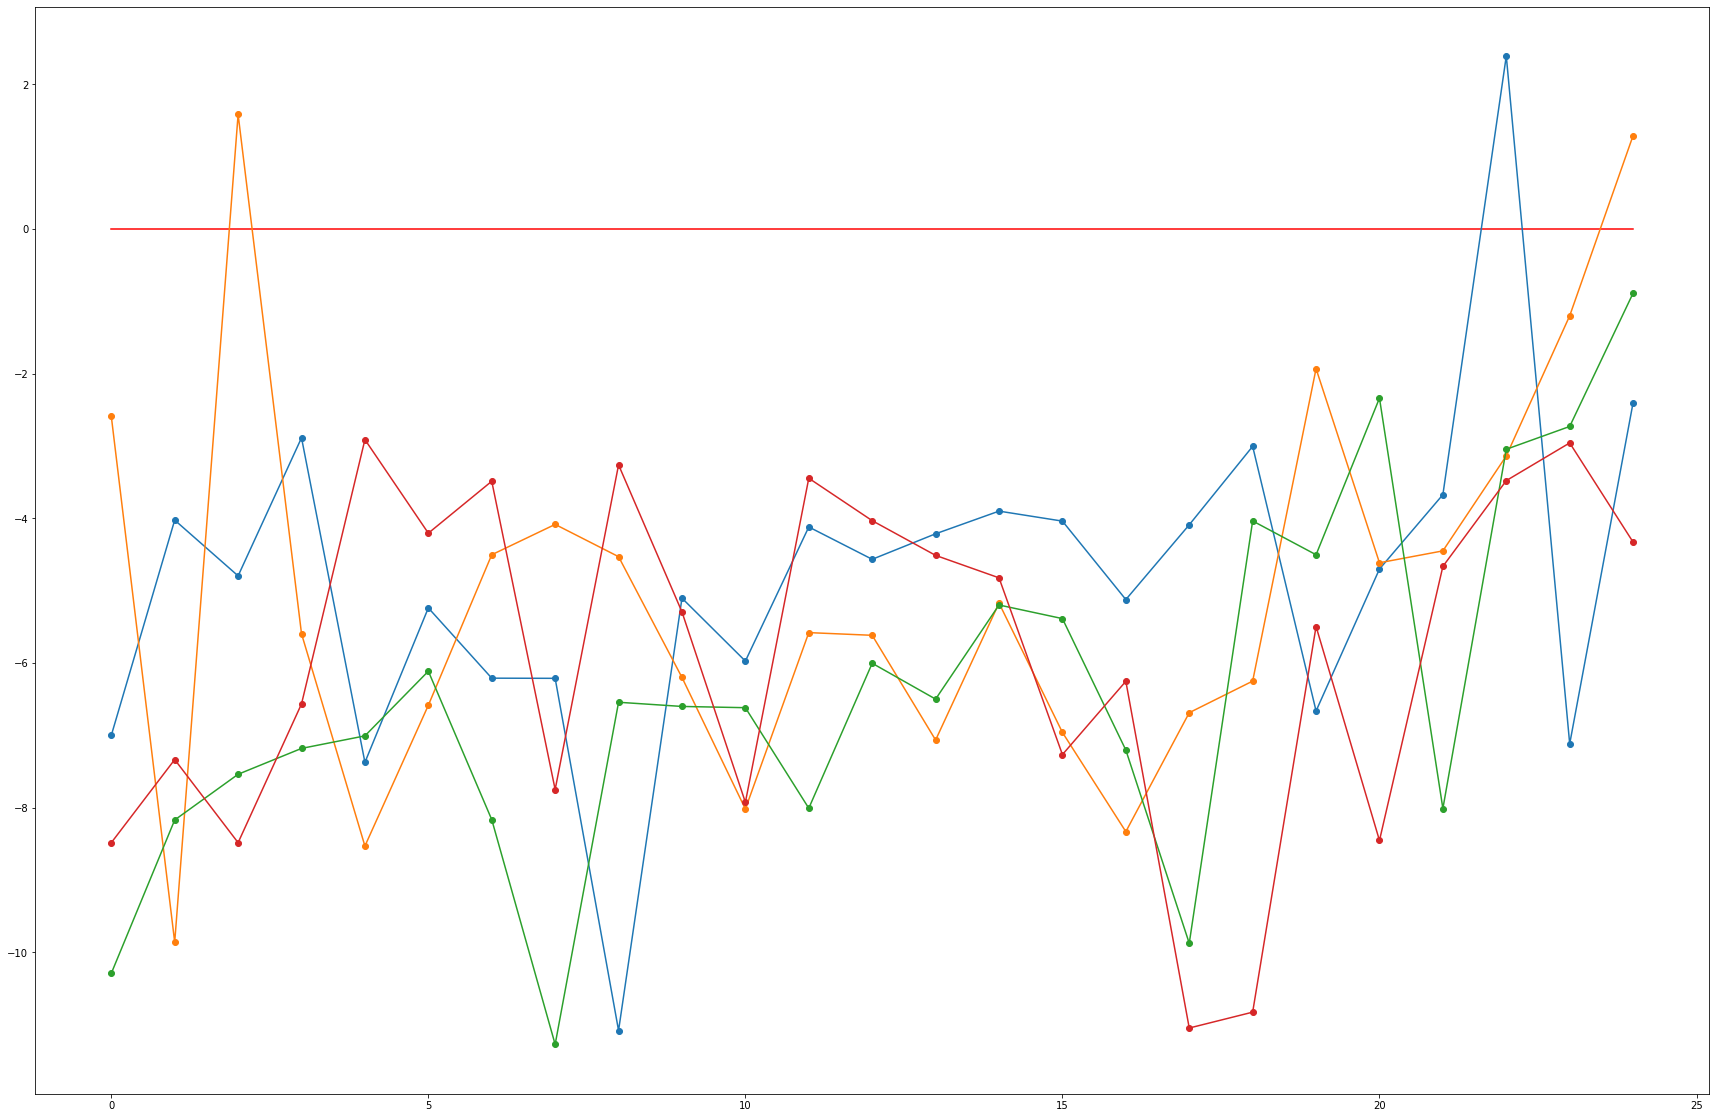

5:F


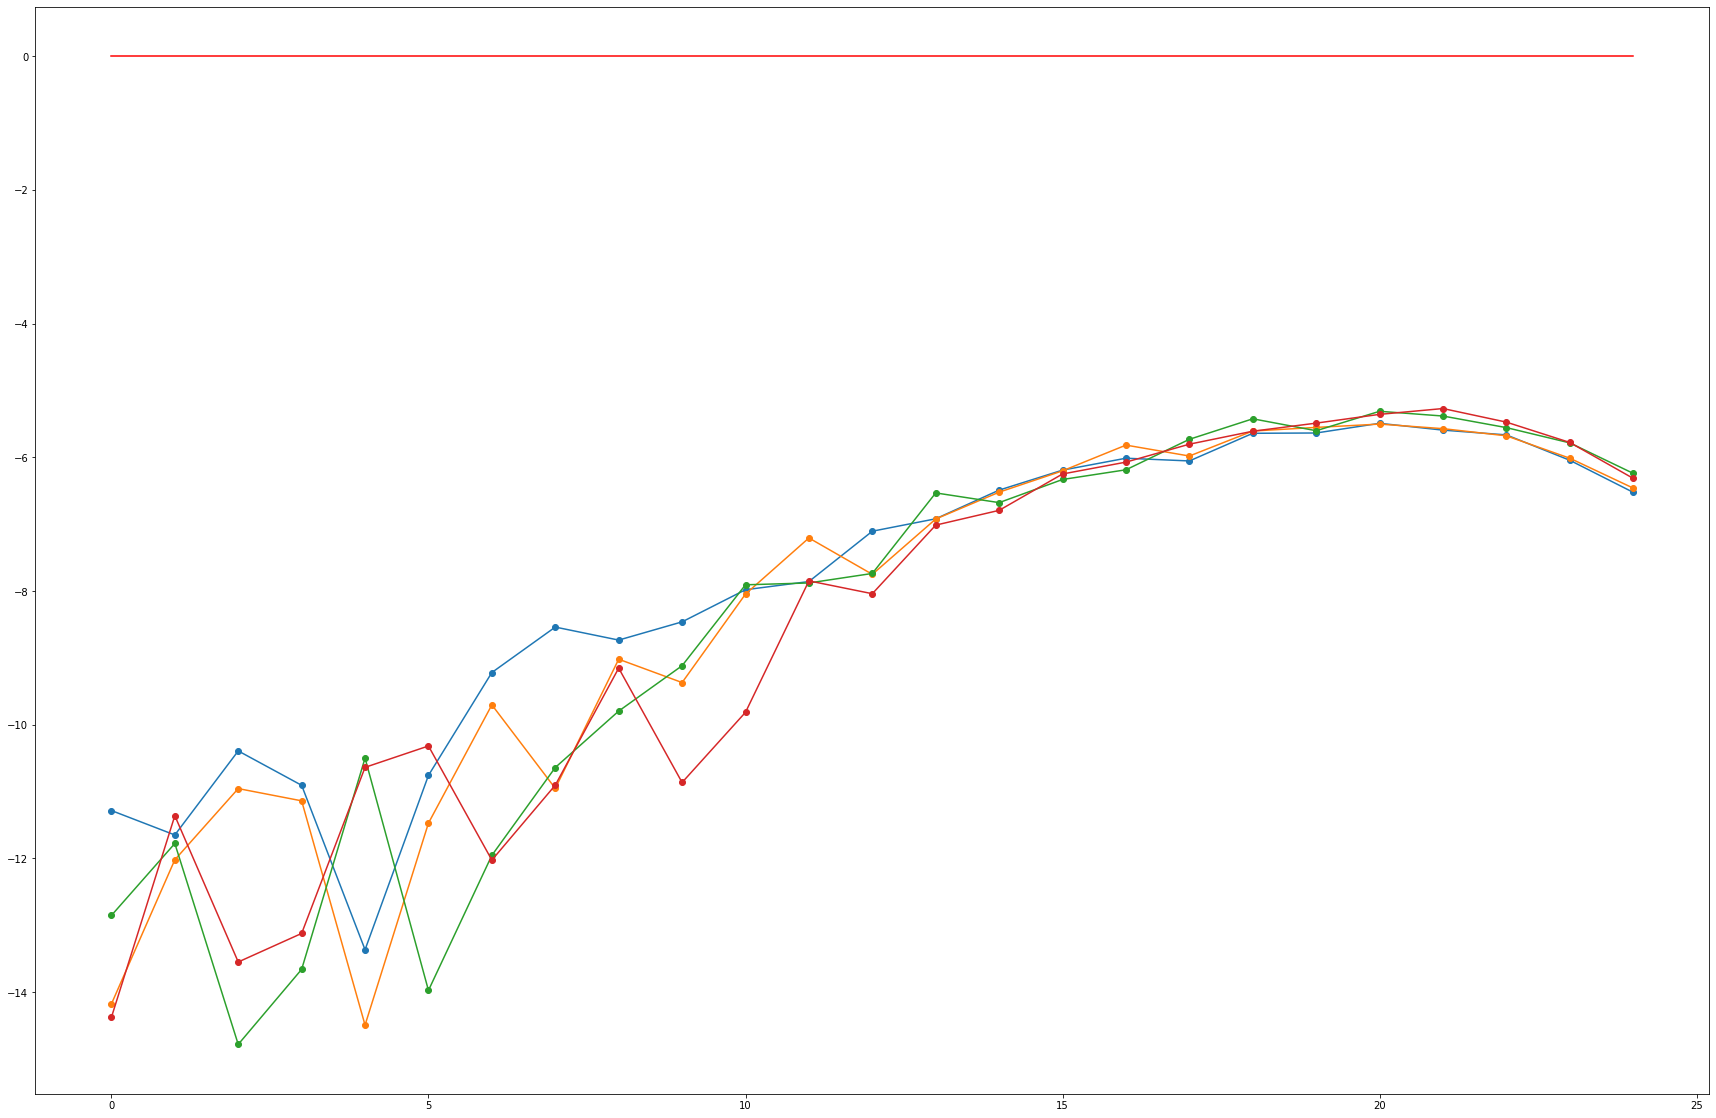

In [13]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhs."+str(i)]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

## V/B

0:tflatten(torch.ones(x.shape.cuda(


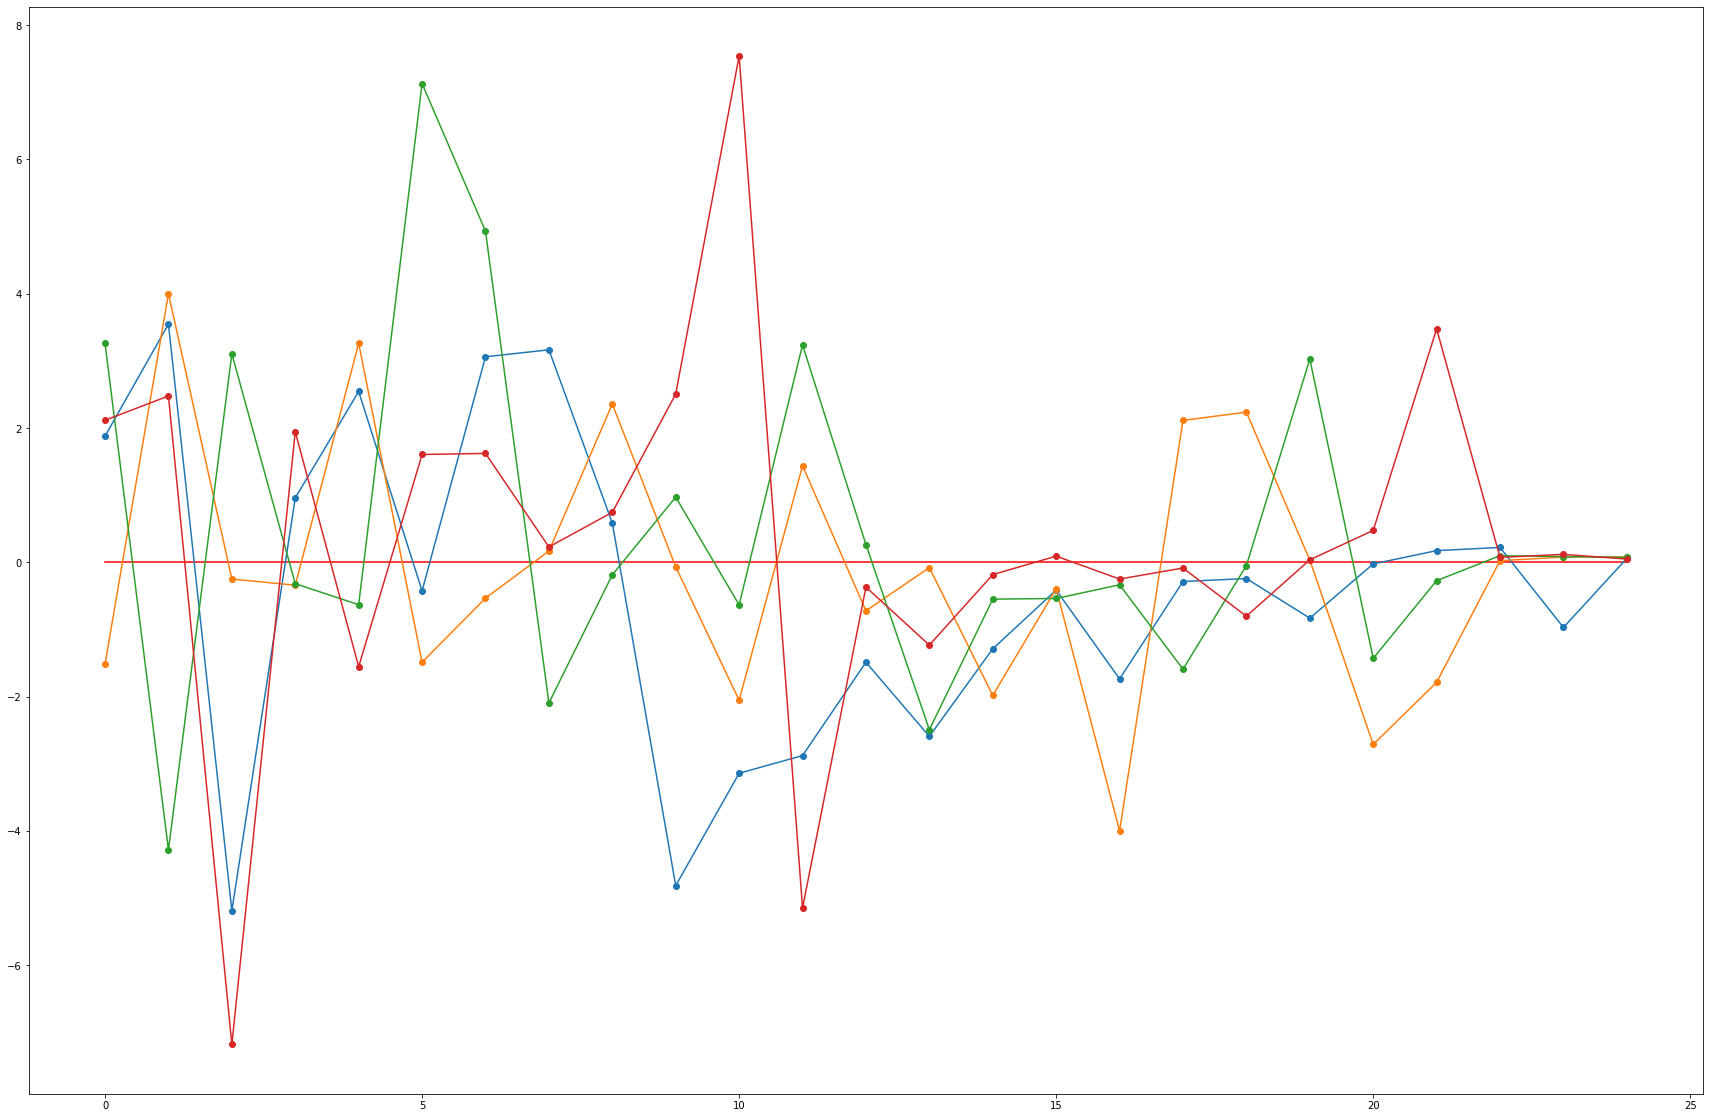

1:xf@


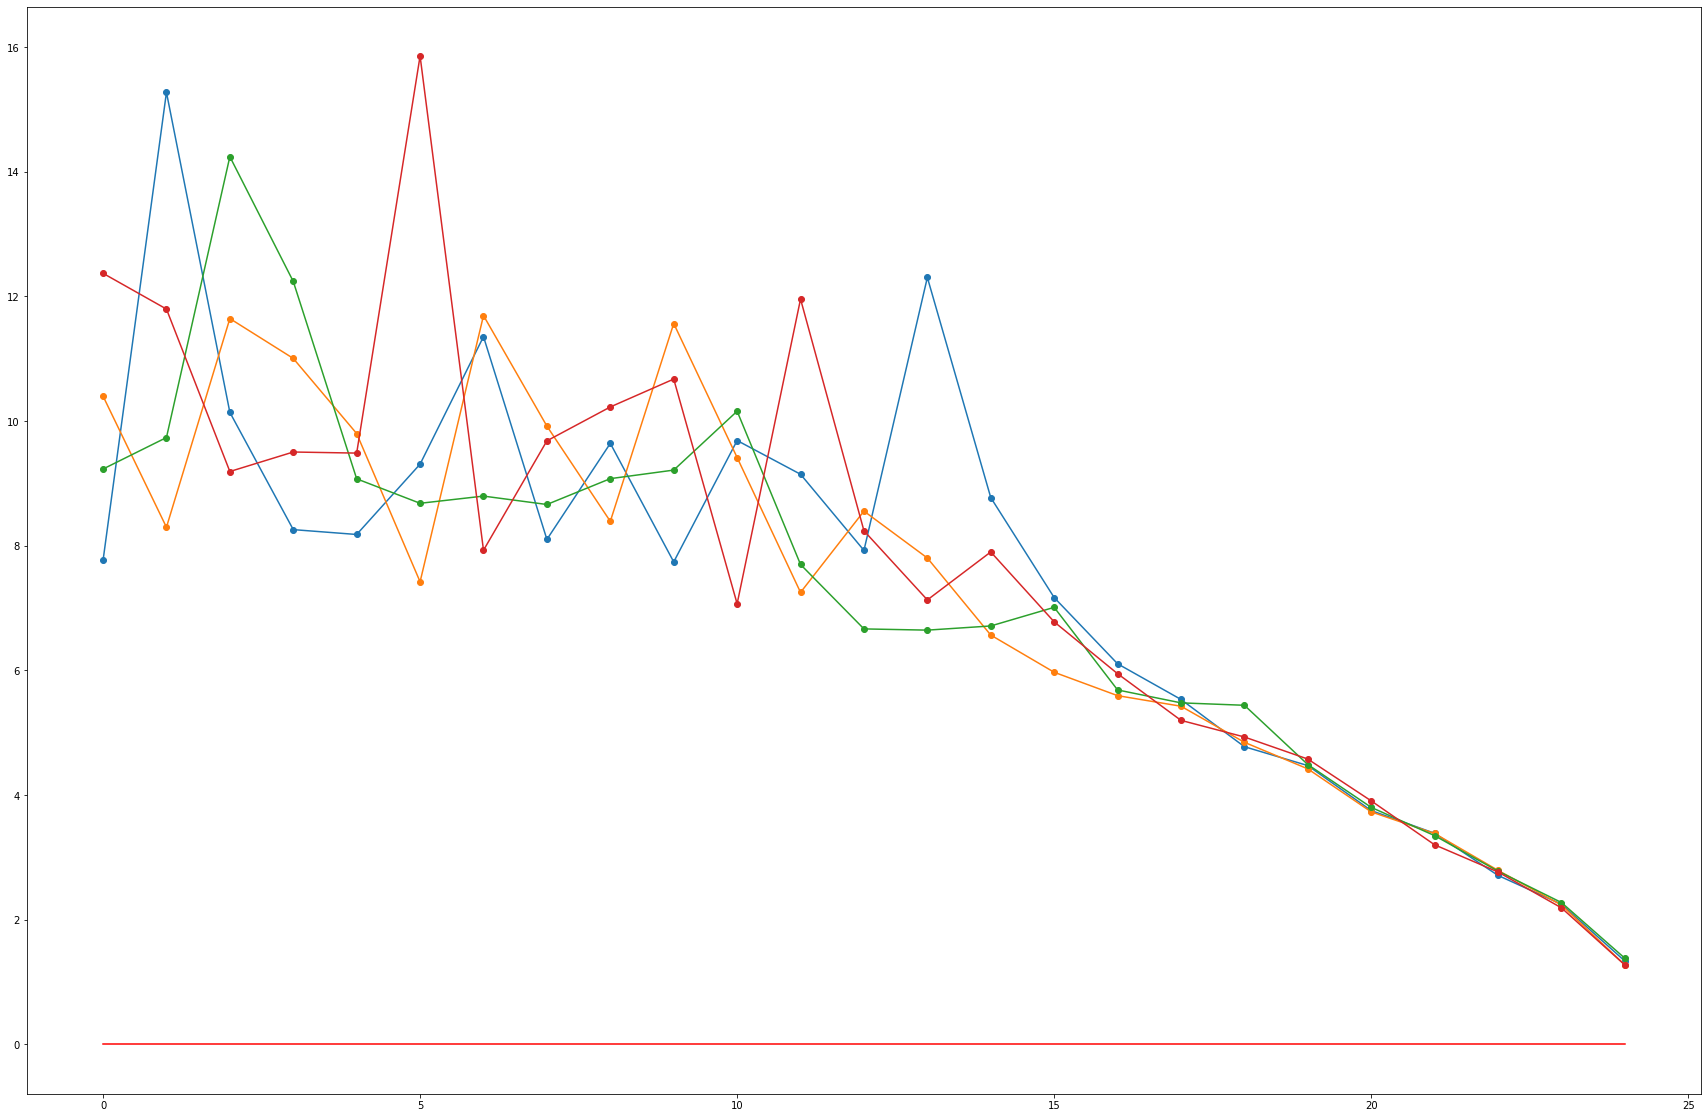

2:-xf2@


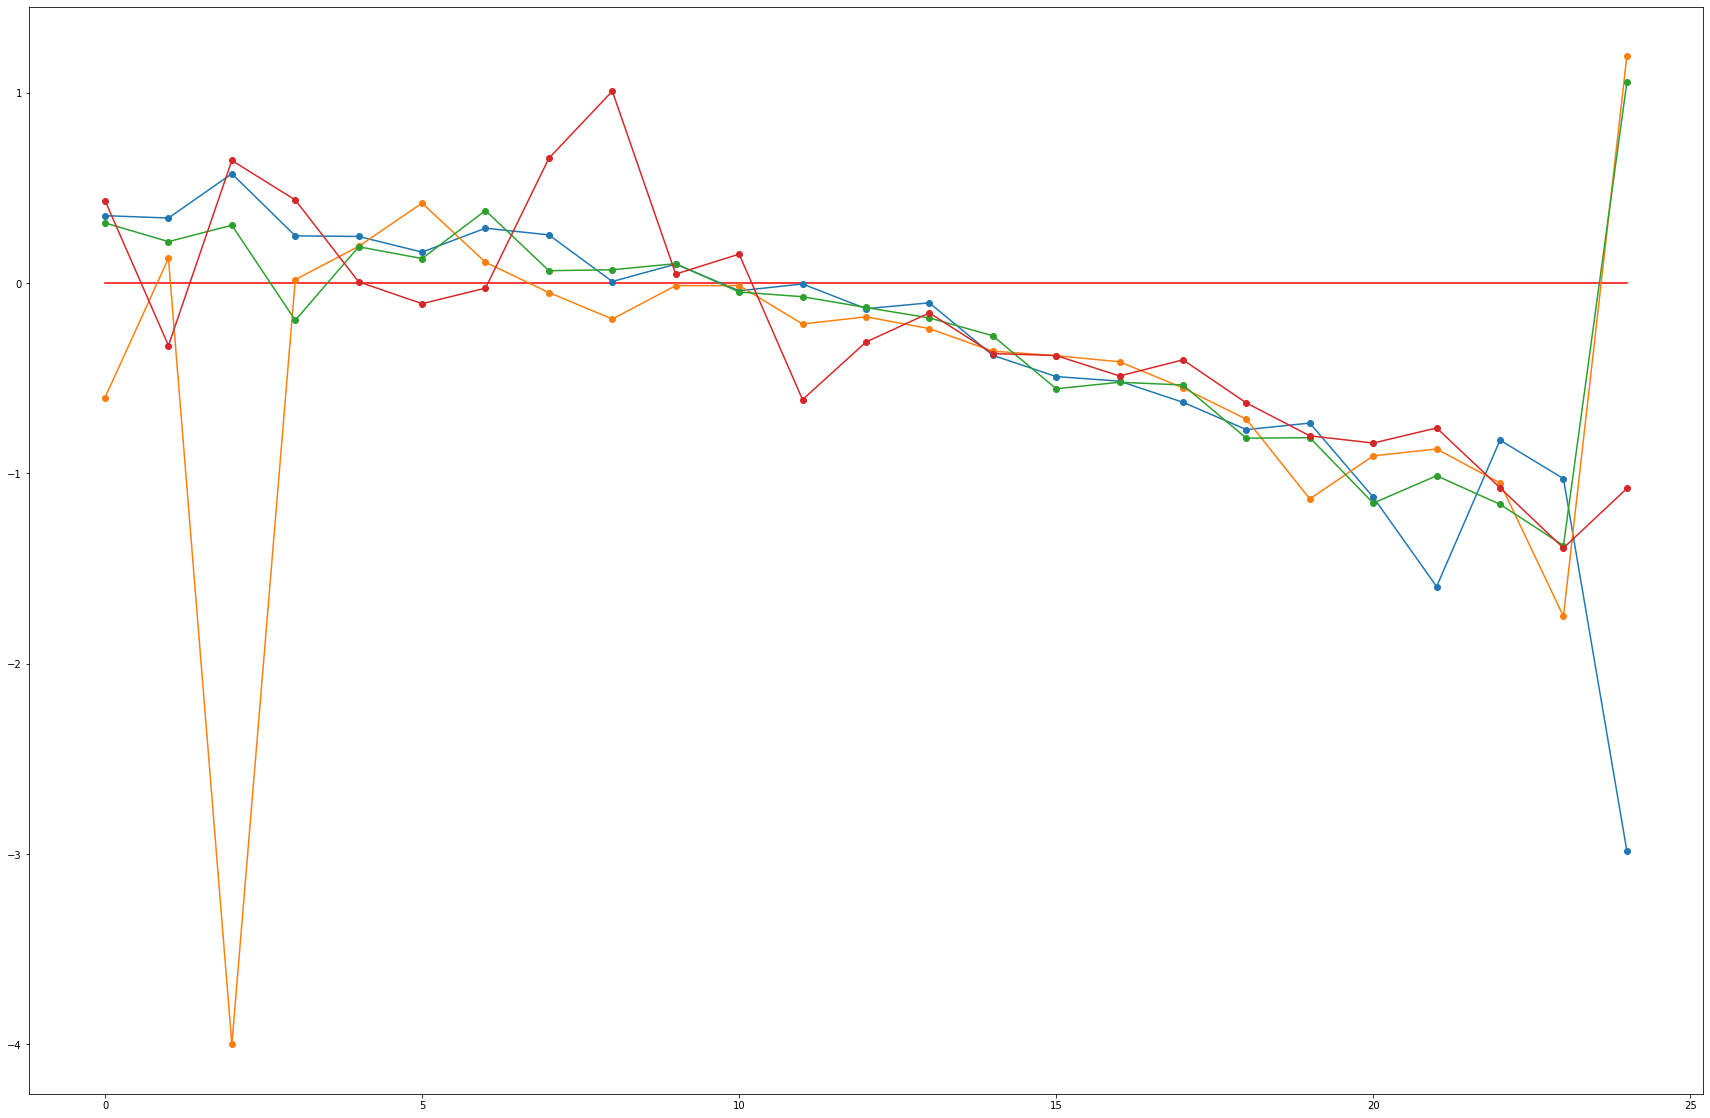

3:x@


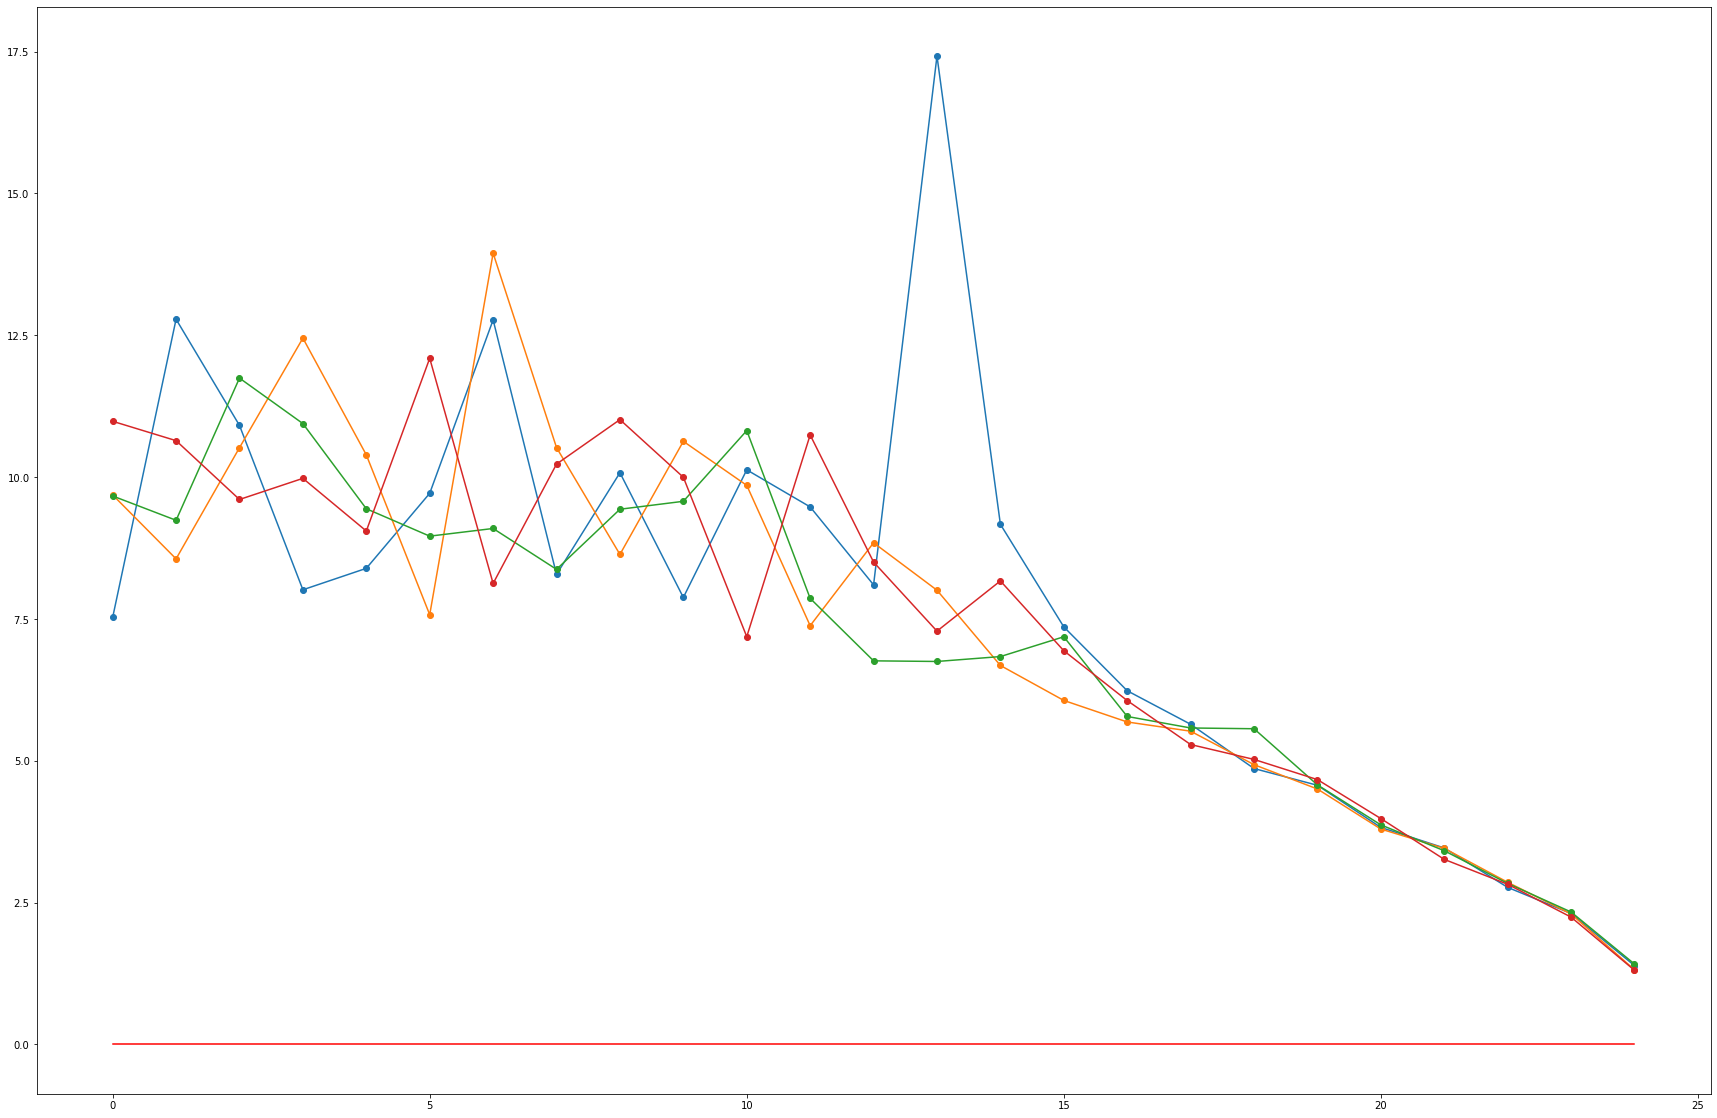

4:x2@


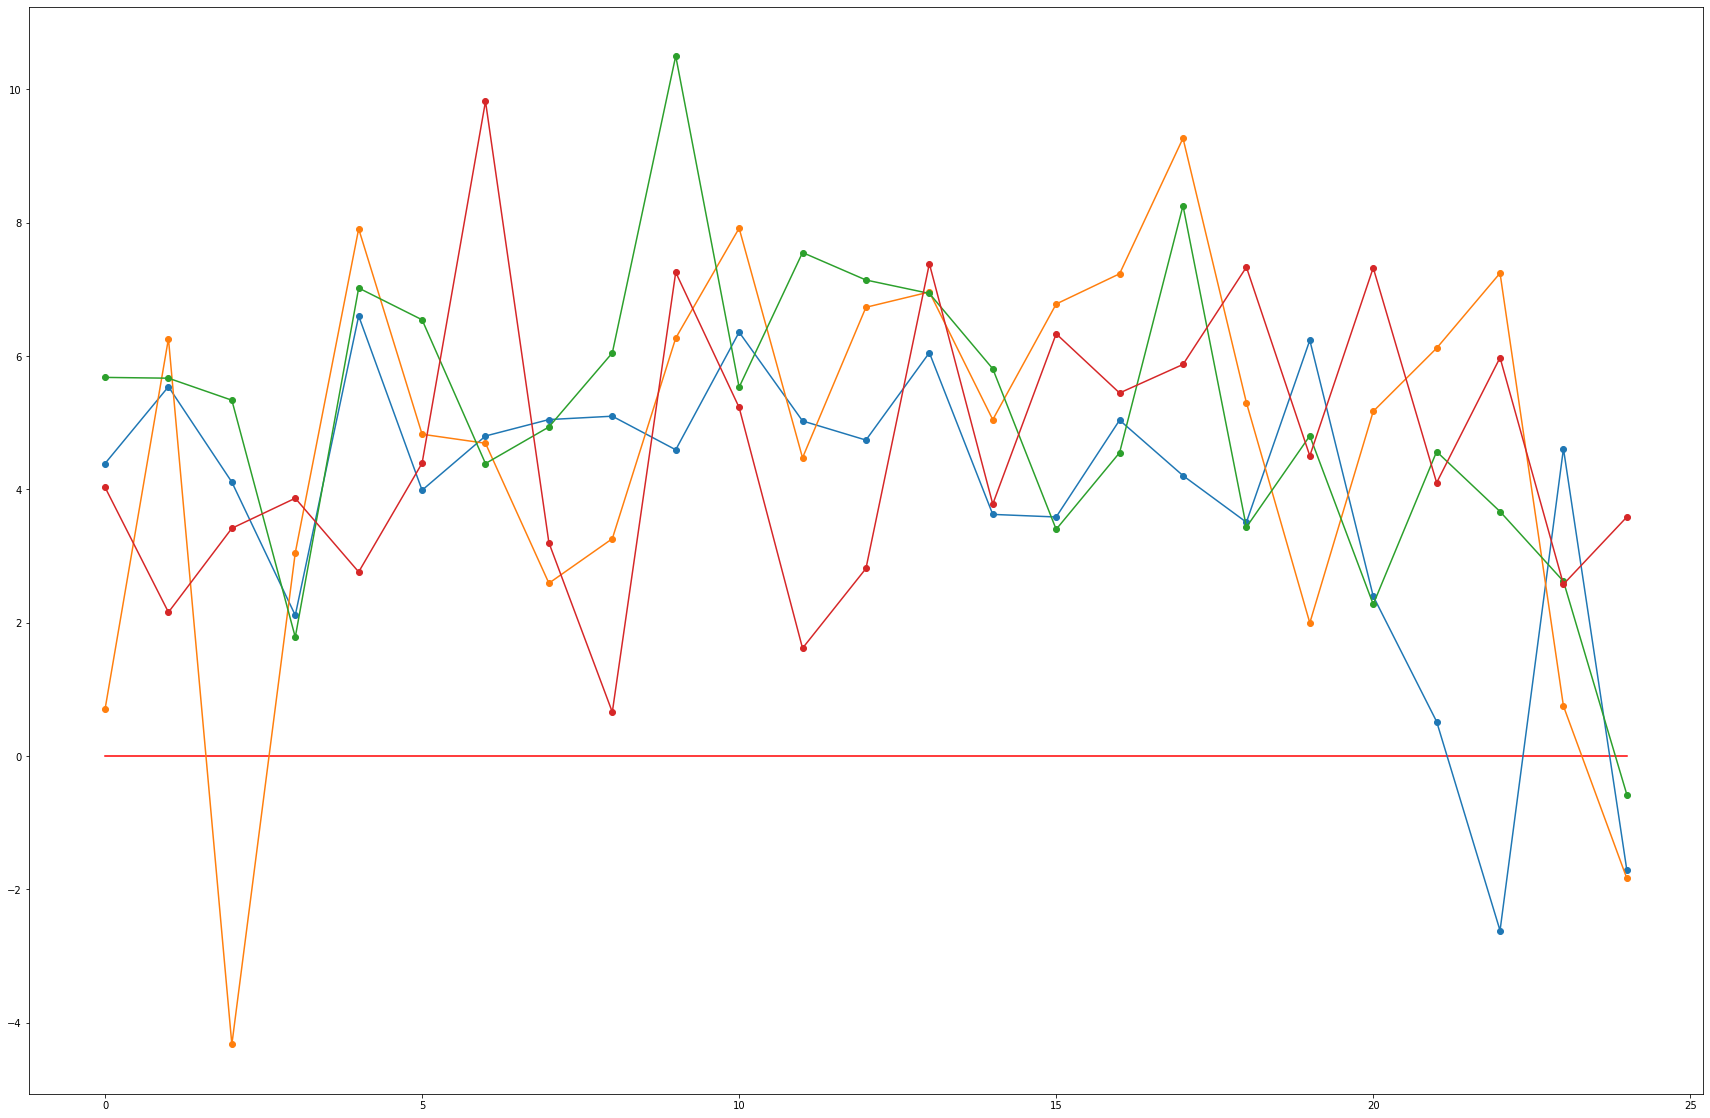

5:F


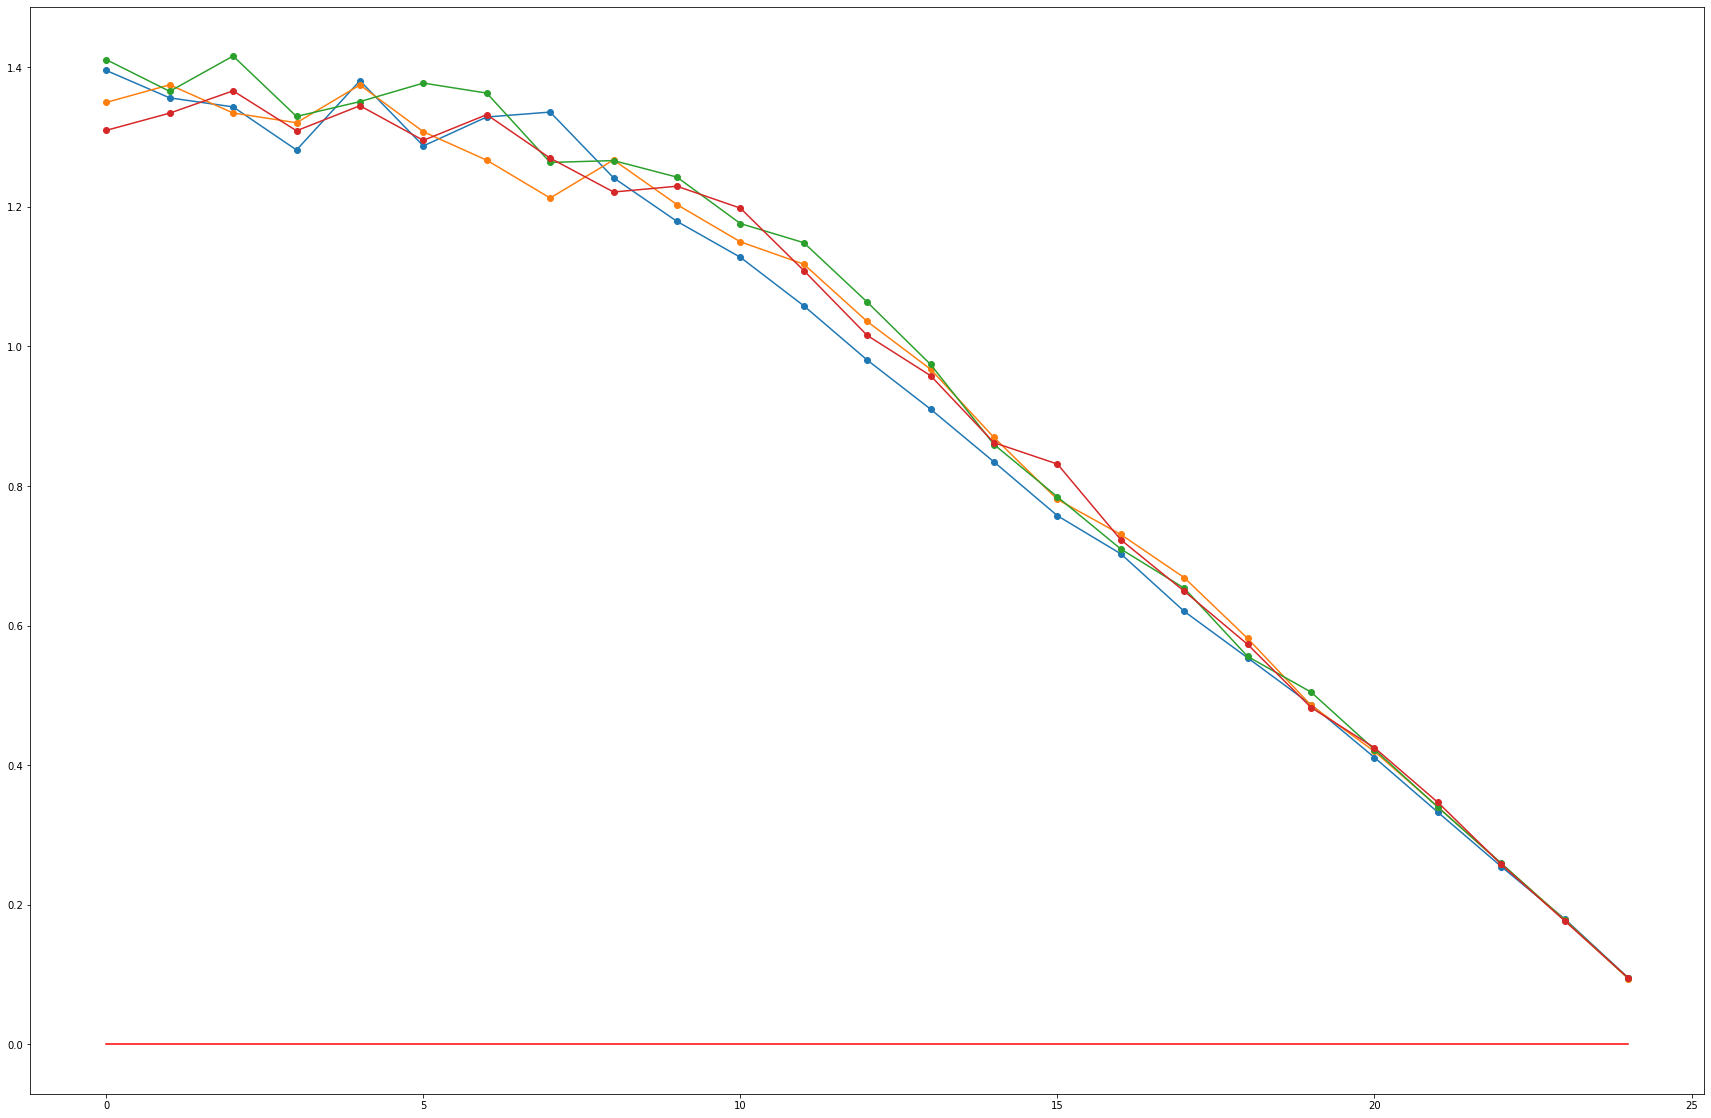

In [14]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhsA(F)."+str(i)]/TUR_log["rhsB(df)."+str(i)],generate_num=generate_num)
    plt.show()